# Loan Data From Prosper
## by Peter Wu

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv', encoding='latin-1', low_memory=False)
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df_dict = pd.read_csv('Prosper Loan Data - Variable Definitions - Sheet1.csv')

#display the full rows and columns of the dictionary dataframe
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000
df_dict

Variable  \
0                            ListingKey   
1                         ListingNumber   
2                   ListingCreationDate   
3                           CreditGrade   
4                                  Term   
5                            LoanStatus   
6                            ClosedDate   
7                           BorrowerAPR   
8                          BorrowerRate   
9                           LenderYield   
10              EstimatedEffectiveYield   
11                        EstimatedLoss   
12                      EstimatedReturn   
13              ProsperRating (numeric)   
14                ProsperRating (Alpha)   
15                         ProsperScore   
16                      ListingCategory   
17                        BorrowerState   
18                           Occupation   
19                     EmploymentStatus   
20             EmploymentStatusDuration   
21                  IsBorrowerHomeowner   
22                     CurrentlyInGroup   
23                             GroupKey   
24                     DateCreditPulled   
25                CreditScoreRangeLower   
26                CreditScoreRangeUpper   
27              FirstRecordedCreditLine   
28                   CurrentCreditLines   
29                      OpenCreditLines   
30           TotalCreditLinespast7years   
31                OpenRevolvingAccounts   
32          OpenRevolvingMonthlyPayment   
33                 InquiriesLast6Months   
34                       TotalInquiries   
35                 CurrentDelinquencies   
36                     AmountDelinquent   
37              DelinquenciesLast7Years   
38             PublicRecordsLast10Years   
39            PublicRecordsLast12Months   
40               RevolvingCreditBalance   
41                  BankcardUtilization   
42              AvailableBankcardCredit   
43                          TotalTrades   
44                TradesNeverDelinquent   
45              TradesOpenedLast6Months   
46                    DebtToIncomeRatio   
47                          IncomeRange   
48                     IncomeVerifiable   
49                  StatedMonthlyIncome   
50                              LoanKey   
51                    TotalProsperLoans   
52           TotalProsperPaymentsBilled   
53                OnTimeProsperPayments   
54  ProsperPaymentsLessThanOneMonthLate   
55      ProsperPaymentsOneMonthPlusLate   
56             ProsperPrincipalBorrowed   
57          ProsperPrincipalOutstanding   
58          ScorexChangeAtTimeOfListing   
59            LoanCurrentDaysDelinquent   
60        LoanFirstDefaultedCycleNumber   
61           LoanMonthsSinceOrigination   
62                           LoanNumber   
63                   LoanOriginalAmount   
64                  LoanOriginationDate   
65               LoanOriginationQuarter   
66                            MemberKey   
67                   MonthlyLoanPayment   
68                  LP_CustomerPayments   
69         LP_CustomerPrincipalPayments   
70                   LP_InterestandFees   
71                       LP_ServiceFees   
72                    LP_CollectionFees   
73                LP_GrossPrincipalLoss   
74                  LP_NetPrincipalLoss   
75      LP_NonPrincipalRecoverypayments   
76                        PercentFunded   
77                      Recommendations   
78           InvestmentFromFriendsCount   
79          InvestmentFromFriendsAmount   
80                            Investors   

                                                                                                                                                                                                                                                                                                                                                                                                                                                            Description  
0                                             

Variable  \
0                            ListingKey   
1                         ListingNumber   
2                   ListingCreationDate   
3                           CreditGrade   
4                                  Term   
5                            LoanStatus   
6                            ClosedDate   
7                           BorrowerAPR   
8                          BorrowerRate   
9                           LenderYield   
10              EstimatedEffectiveYield   
11                        EstimatedLoss   
12                      EstimatedReturn   
13              ProsperRating (numeric)   
14                ProsperRating (Alpha)   
15                         ProsperScore   
16                      ListingCategory   
17                        BorrowerState   
18                           Occupation   
19                     EmploymentStatus   
20             EmploymentStatusDuration   
21                  IsBorrowerHomeowner   
22                     CurrentlyInGroup   
23                             GroupKey   
24                     DateCreditPulled   
25                CreditScoreRangeLower   
26                CreditScoreRangeUpper   
27              FirstRecordedCreditLine   
28                   CurrentCreditLines   
29                      OpenCreditLines   
30           TotalCreditLinespast7years   
31                OpenRevolvingAccounts   
32          OpenRevolvingMonthlyPayment   
33                 InquiriesLast6Months   
34                       TotalInquiries   
35                 CurrentDelinquencies   
36                     AmountDelinquent   
37              DelinquenciesLast7Years   
38             PublicRecordsLast10Years   
39            PublicRecordsLast12Months   
40               RevolvingCreditBalance   
41                  BankcardUtilization   
42              AvailableBankcardCredit   
43                          TotalTrades   
44                TradesNeverDelinquent   
45              TradesOpenedLast6Months   
46                    DebtToIncomeRatio   
47                          IncomeRange   
48                     IncomeVerifiable   
49                  StatedMonthlyIncome   
50                              LoanKey   
51                    TotalProsperLoans   
52           TotalProsperPaymentsBilled   
53                OnTimeProsperPayments   
54  ProsperPaymentsLessThanOneMonthLate   
55      ProsperPaymentsOneMonthPlusLate   
56             ProsperPrincipalBorrowed   
57          ProsperPrincipalOutstanding   
58          ScorexChangeAtTimeOfListing   
59            LoanCurrentDaysDelinquent   
60        LoanFirstDefaultedCycleNumber   
61           LoanMonthsSinceOrigination   
62                           LoanNumber   
63                   LoanOriginalAmount   
64                  LoanOriginationDate   
65               LoanOriginationQuarter   
66                            MemberKey   
67                   MonthlyLoanPayment   
68                  LP_CustomerPayments   
69         LP_CustomerPrincipalPayments   
70                   LP_InterestandFees   
71                       LP_ServiceFees   
72                    LP_CollectionFees   
73                LP_GrossPrincipalLoss   
74                  LP_NetPrincipalLoss   
75      LP_NonPrincipalRecoverypayments   
76                        PercentFunded   
77                      Recommendations   
78           InvestmentFromFriendsCount   
79          InvestmentFromFriendsAmount   
80                            Investors   

                                                                                                                                                                                                                                                                                                                                                                                                                                                            Description  
0                                             

In [5]:
#Copy the dataset, and only select those columns that will be used

cols = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory', 'EmploymentStatus'
          , 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatioff', 
           'StatedMonthlyIncome', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'ProsperScore']
df_sub = df.copy()
df_sub = df_sub.loc[:, df.columns.isin(cols)]

In [6]:
df_sub

Term              LoanStatus  BorrowerAPR  BorrowerRate  ProsperScore  \
0         36               Completed      0.16516        0.1580           NaN   
1         36                 Current      0.12016        0.0920           7.0   
2         36               Completed      0.28269        0.2750           NaN   
3         36                 Current      0.12528        0.0974           9.0   
4         36                 Current      0.24614        0.2085           4.0   
5         60                 Current      0.15425        0.1314          10.0   
6         36                 Current      0.31032        0.2712           2.0   
7         36                 Current      0.23939        0.2019           4.0   
8         36                 Current      0.07620        0.0629           9.0   
9         36                 Current      0.07620        0.0629          11.0   
10        60                 Current      0.27462        0.2489           7.0   
11        36               Completed      0.15033        0.1325           NaN   
12        36    Past Due (1-15 days)      0.17969        0.1435           4.0   
13        36                 Current      0.13138        0.1034           8.0   
14        60                 Current      0.11695        0.0949           8.0   
15        36               Defaulted      0.35797        0.3177           5.0   
16        60                 Current      0.30748        0.2809           4.0   
17        36              Chargedoff      0.13202        0.1250           NaN   
18        36                 Current      0.12528        0.0974           7.0   
19        60                 Current      0.24754        0.2225           8.0   
20        36                 Current      0.16732        0.1314           7.0   
21        36               Completed      0.21488        0.2075           NaN   
22        36                 Current      0.35356        0.3134           2.0   
23        36               Defaulted      0.28032        0.2419           5.0   
24        36                 Current      0.19859        0.1620           5.0   
25        36                 Current      0.30182        0.2629           3.0   
26        60               Completed      0.30748        0.2809           3.0   
27        36               Completed      0.11296        0.0920           9.0   
28        36                 Current      0.20268        0.1660           4.0   
29        36                 Current      0.15223        0.1239           6.0   
30        36               Completed      0.12782        0.0999           9.0   
31        36                 Current      0.35797        0.3177           5.0   
32        36                 Current      0.16324        0.1274           8.0   
33        36               Completed      0.08191        0.0785          10.0   
34        36                 Current      0.22966        0.1920           5.0   
35        36                 Current      0.19108        0.1621           8.0   
36        36                 Current      0.32446        0.2850           2.0   
37        36                 Current      0.28544        0.2469           6.0   
38        36                 Current      0.08930        0.0759           9.0   
39        36               Completed      0.15211        0.1450           NaN   
40        60                 Current      0.19630        0.1725           4.0   
41        60                 Current      0.23318        0.2085           8.0   
42        36              Chargedoff      0.30300        0.2900           NaN   
43        36                 Current      0.21290        0.1760           6.0   
44        36                 Current      0.21025        0.1734           5.0   
45        60                 Current      0.13227        0.1099           7.0   
46        36               Completed      0.17170        0.1500           NaN   
47        36                 Current      0.15833        0.1299           8.0   
48        60                 Current   

Term              LoanStatus  BorrowerAPR  BorrowerRate  ProsperScore  \
0         36               Completed      0.16516        0.1580           NaN   
1         36                 Current      0.12016        0.0920           7.0   
2         36               Completed      0.28269        0.2750           NaN   
3         36                 Current      0.12528        0.0974           9.0   
4         36                 Current      0.24614        0.2085           4.0   
5         60                 Current      0.15425        0.1314          10.0   
6         36                 Current      0.31032        0.2712           2.0   
7         36                 Current      0.23939        0.2019           4.0   
8         36                 Current      0.07620        0.0629           9.0   
9         36                 Current      0.07620        0.0629          11.0   
10        60                 Current      0.27462        0.2489           7.0   
11        36               Completed      0.15033        0.1325           NaN   
12        36    Past Due (1-15 days)      0.17969        0.1435           4.0   
13        36                 Current      0.13138        0.1034           8.0   
14        60                 Current      0.11695        0.0949           8.0   
15        36               Defaulted      0.35797        0.3177           5.0   
16        60                 Current      0.30748        0.2809           4.0   
17        36              Chargedoff      0.13202        0.1250           NaN   
18        36                 Current      0.12528        0.0974           7.0   
19        60                 Current      0.24754        0.2225           8.0   
20        36                 Current      0.16732        0.1314           7.0   
21        36               Completed      0.21488        0.2075           NaN   
22        36                 Current      0.35356        0.3134           2.0   
23        36               Defaulted      0.28032        0.2419           5.0   
24        36                 Current      0.19859        0.1620           5.0   
25        36                 Current      0.30182        0.2629           3.0   
26        60               Completed      0.30748        0.2809           3.0   
27        36               Completed      0.11296        0.0920           9.0   
28        36                 Current      0.20268        0.1660           4.0   
29        36                 Current      0.15223        0.1239           6.0   
30        36               Completed      0.12782        0.0999           9.0   
31        36                 Current      0.35797        0.3177           5.0   
32        36                 Current      0.16324        0.1274           8.0   
33        36               Completed      0.08191        0.0785          10.0   
34        36                 Current      0.22966        0.1920           5.0   
35        36                 Current      0.19108        0.1621           8.0   
36        36                 Current      0.32446        0.2850           2.0   
37        36                 Current      0.28544        0.2469           6.0   
38        36                 Current      0.08930        0.0759           9.0   
39        36               Completed      0.15211        0.1450           NaN   
40        60                 Current      0.19630        0.1725           4.0   
41        60                 Current      0.23318        0.2085           8.0   
42        36              Chargedoff      0.30300        0.2900           NaN   
43        36                 Current      0.21290        0.1760           6.0   
44        36                 Current      0.21025        0.1734           5.0   
45        60                 Current      0.13227        0.1099           7.0   
46        36               Completed      0.17170        0.1500           NaN   
47        36                 Current      0.15833        0.1299           8.0   
48        60                 Current   

In [7]:
df_sub['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [8]:
# rename the LoanStatus column for better visualization, and make it categorical
def renameLoanStatus(x):
    if 'Past Due' in x:
        return 'Past Due'
    elif x == 'FinalPaymentInProgress':
        return 'InProgress'
    return x
        
df_sub.LoanStatus = df_sub.LoanStatus.apply(renameLoanStatus);
df_sub.LoanStatus = df_sub.LoanStatus.astype('category')

In [9]:
df_sub.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [10]:
#  make EmploymentStatus categorical
df_sub.EmploymentStatus = df_sub.EmploymentStatus.astype('category')

In [11]:
# overview of the datatypes and infomation
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
Term                          113937 non-null int64
LoanStatus                    113937 non-null category
BorrowerAPR                   113912 non-null float64
BorrowerRate                  113937 non-null float64
ProsperScore                  84853 non-null float64
EmploymentStatus              111682 non-null category
IsBorrowerHomeowner           113937 non-null bool
CreditScoreRangeLower         113346 non-null float64
CreditScoreRangeUpper         113346 non-null float64
StatedMonthlyIncome           113937 non-null float64
PercentFunded                 113937 non-null float64
Recommendations               113937 non-null int64
InvestmentFromFriendsCount    113937 non-null int64
dtypes: bool(1), category(2), float64(7), int64(3)
memory usage: 9.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
Term        

In [12]:
# descriptive statistics for numeric variables
df_sub.describe()

Term    BorrowerAPR   BorrowerRate  ProsperScore  \
count  113937.000000  113912.000000  113937.000000  84853.000000   
mean       40.830248       0.218828       0.192764      5.950067   
std        10.436212       0.080364       0.074818      2.376501   
min        12.000000       0.006530       0.000000      1.000000   
25%        36.000000       0.156290       0.134000      4.000000   
50%        36.000000       0.209760       0.184000      6.000000   
75%        36.000000       0.283810       0.250000      8.000000   
max        60.000000       0.512290       0.497500     11.000000   

       CreditScoreRangeLower  CreditScoreRangeUpper  StatedMonthlyIncome  \
count          113346.000000          113346.000000         1.139370e+05   
mean              685.567731             704.567731         5.608026e+03   
std                66.458275              66.458275         7.478497e+03   
min                 0.000000              19.000000         0.000000e+00   
25%               660.000000             679.000000         3.200333e+03   
50%               680.000000             699.000000         4.666667e+03   
75%               720.000000             739.000000         6.825000e+03   
max               880.000000             899.000000         1.750003e+06   

       PercentFunded  Recommendations  InvestmentFromFriendsCount  
count  113937.000000    113937.000000               113937.000000  
mean        0.998584         0.048027                    0.023460  
std         0.017919         0.332353                    0.232412  
min         0.700000         0.000000                    0.000000  
25%         1.000000         0.000000                    0.000000  
50%         1.000000         0.000000                    0.000000  
75%         1.000000         0.000000                    0.000000  
max         1.012500        39.000000                   33.000000

Term    BorrowerAPR   BorrowerRate  ProsperScore  \
count  113937.000000  113912.000000  113937.000000  84853.000000   
mean       40.830248       0.218828       0.192764      5.950067   
std        10.436212       0.080364       0.074818      2.376501   
min        12.000000       0.006530       0.000000      1.000000   
25%        36.000000       0.156290       0.134000      4.000000   
50%        36.000000       0.209760       0.184000      6.000000   
75%        36.000000       0.283810       0.250000      8.000000   
max        60.000000       0.512290       0.497500     11.000000   

       CreditScoreRangeLower  CreditScoreRangeUpper  StatedMonthlyIncome  \
count          113346.000000          113346.000000         1.139370e+05   
mean              685.567731             704.567731         5.608026e+03   
std                66.458275              66.458275         7.478497e+03   
min                 0.000000              19.000000         0.000000e+00   
25%               660.000000             679.000000         3.200333e+03   
50%               680.000000             699.000000         4.666667e+03   
75%               720.000000             739.000000         6.825000e+03   
max               880.000000             899.000000         1.750003e+06   

       PercentFunded  Recommendations  InvestmentFromFriendsCount  
count  113937.000000    113937.000000               113937.000000  
mean        0.998584         0.048027                    0.023460  
std         0.017919         0.332353                    0.232412  
min         0.700000         0.000000                    0.000000  
25%         1.000000         0.000000                    0.000000  
50%         1.000000         0.000000                    0.000000  
75%         1.000000         0.000000                    0.000000  
max         1.012500        39.000000                   33.000000


#### There are 113937 loans within the dataset, and initially with 81 variables on each loan. Some variables are just IDs of the loans, while  others are personal infomation about the borrowers. I only extracted a fraction of the variables to analyze on, which I think will be intersting to work with. There are 14 columns I used:

    Term                      
    LoanStatus                    
    BorrowerAPR                   
    BorrowerRate                                   
    EmploymentStatus              
    IsBorrowerHomeowner          
    CreditScoreRangeLower         
    CreditScoreRangeUpper         
    StatedMonthlyIncome           
    PercentFunded                 
    Recommendations               
    InvestmentFromFriendsCount
    ProsperScore
* Most variables are numertic, while there are 3 categorical ones.


#### I am interested in two things: first, which features are best at predicting the `LoanStatus`; second, which features determine the `BorrowerAPR `  and  `BorrowerRate` at most?

#### I expect the two `CreditScoreRange` will have the most effect on loan completion, and variables like `Occupation`, `EmploymentStatus`, `IsBorrowerHomeowner` will determine the borrowers's interest rate.

## Univariate Exploration

> I'll start by looking at the loan status.

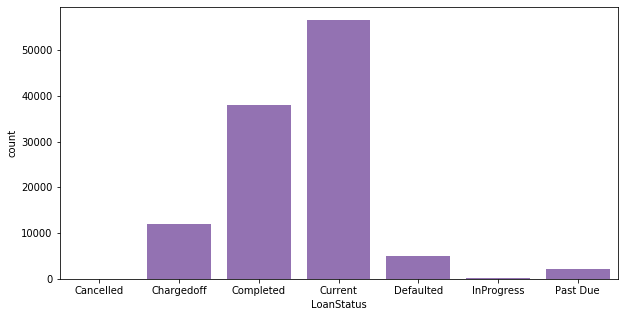

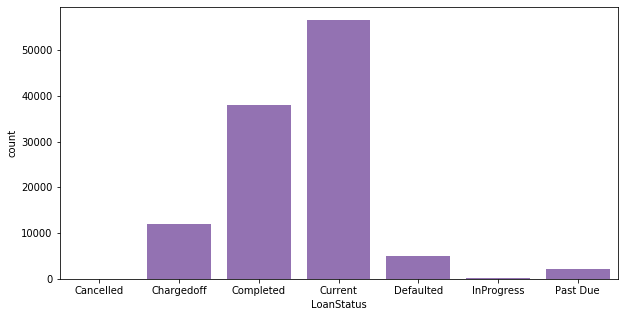

In [13]:
# absolute Frequency of LoanStatus
base_color = sb.color_palette()[4]
plt.figure(figsize=(10,5))
sb.countplot(data=df_sub, x='LoanStatus', color=base_color);

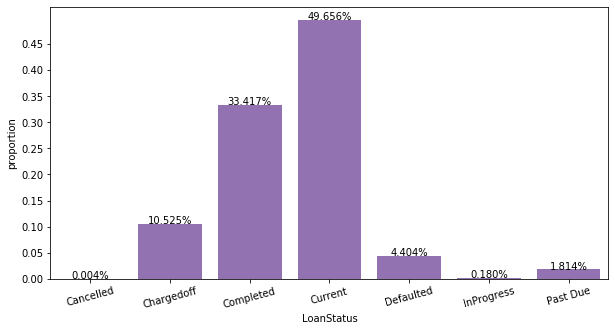

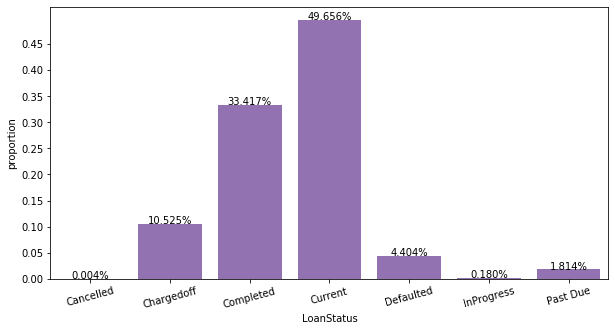

In [14]:
# get the relative frequency of LoanStatus, i.e., by proportion
n_points = df_sub.shape[0]
max_count = df_sub['LoanStatus'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize=(10,5))
sb.countplot(data = df_sub, x = 'LoanStatus', color = base_color, )
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = df_sub['LoanStatus'].value_counts()[label.get_text()]
    pct_string = '{:0.3f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

plt.xticks(rotation = 15);

About half of the loans are ongoing, and with more than 5% of the loans are bad (means they are either defaulted or past due).  

Next up, the `Term` variable.

It would be better to categorize `Term`.

In [15]:
df_sub['Term'] = df_sub['Term'].astype('category')

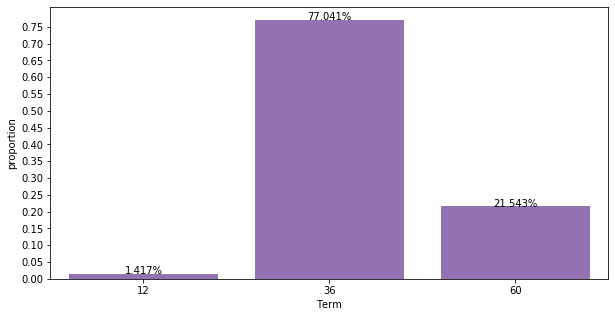

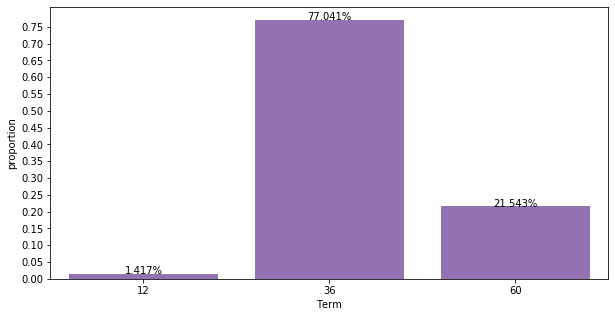

In [16]:
# get the relative frequency of Term, i.e., by proportion
n_points = df_sub.shape[0]
max_count = df_sub['Term'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize=(10,5))
sb.countplot(data = df_sub, x = 'Term', color = base_color, )
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

locs, labels = plt.xticks() # get the current tick locations and labels

# also loops over the value_counts series
j = 0

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = df_sub['Term'].value_counts()[j]
    pct_string = '{:0.3f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

    j += 1

The majority of of `term` is 36 months.

Let's take a look at the `EmploymentStatus` and `IsBorrowerHomeowner`, the two categorical variables

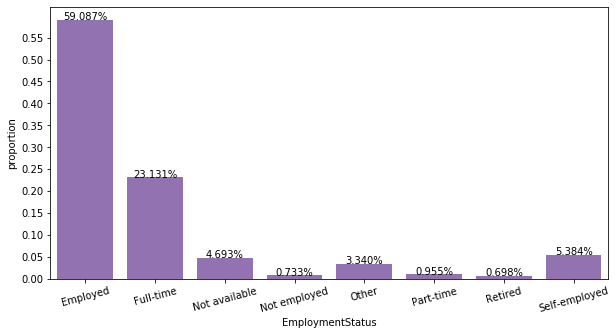

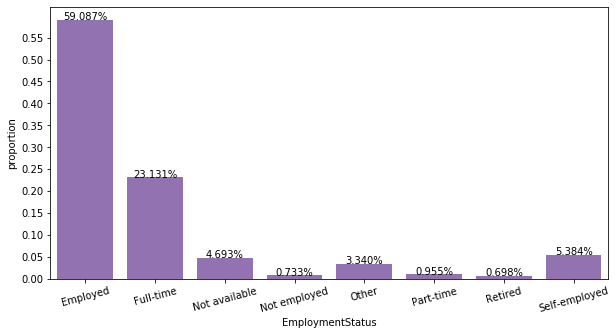

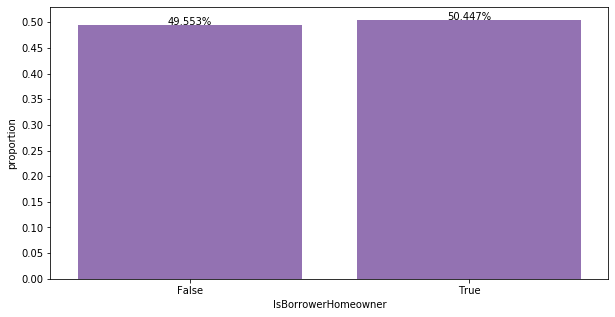

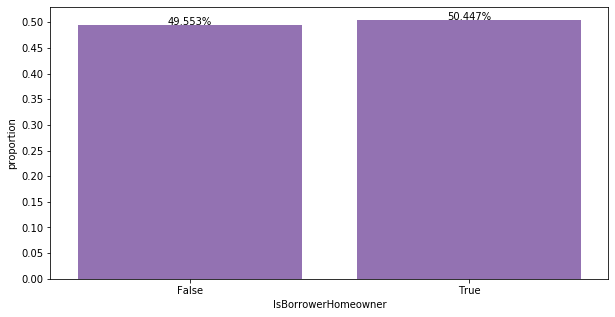

In [17]:
# get the relative frequency of EmploymentStatus, i.e., by proportion
n_points = df_sub.shape[0]
max_count = df_sub['EmploymentStatus'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize=(10,5))
sb.countplot(data = df_sub, x = 'EmploymentStatus', color = base_color, )
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = df_sub['EmploymentStatus'].value_counts()[label.get_text()]
    pct_string = '{:0.3f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

plt.xticks(rotation = 15);

# do the same to IsBorrowerHomeowner, but create a pie chart instead
n_points = df_sub.shape[0]
max_count = df_sub['IsBorrowerHomeowner'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize=(10,5))
sb.countplot(data = df_sub, x = 'IsBorrowerHomeowner', color = base_color, )
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels

# also loop over the value_counts series
j = 0

for loc, label in zip(locs, labels):

    # get the index of series to get the boolean variable
    count = df_sub['IsBorrowerHomeowner'].value_counts()[j]
    pct_string = '{:0.3f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
    j += 1

The majority of th borrowers are employed, however, wouldn't the 'Employed' column being more general than the 'Full-time' and 'Part-time'? 

Approximately half of the borrowers owned a house.

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


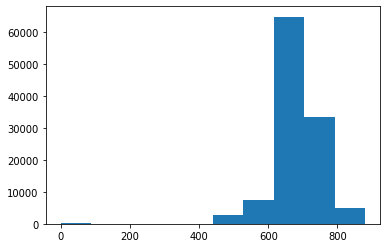

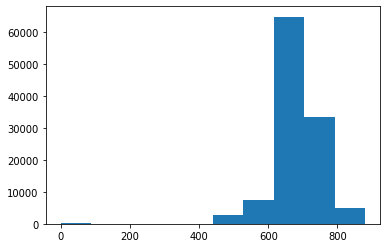

In [18]:
# CreditScoreRangeLower

plt.hist(data=df_sub, x='CreditScoreRangeLower');

# noting that there are some outliers below the 200 ticks

In [19]:
# examine those data with a very low credit score
df_sub.query('CreditScoreRangeLower < 200')

Term  LoanStatus  BorrowerAPR  BorrowerRate  ProsperScore  \
794      36   Completed      0.29776        0.2900           NaN   
912      36   Defaulted      0.27276        0.2600           NaN   
1685     36  Chargedoff      0.18065        0.1625           NaN   
4290     36  Chargedoff      0.24502        0.2375           NaN   
4371     36   Defaulted      0.24505        0.2325           NaN   
4430     36   Defaulted      0.16296        0.1450           NaN   
4672     36  Chargedoff      0.20836        0.1930           NaN   
5684     36   Completed      0.23748        0.2300           NaN   
6877     36  Chargedoff      0.08718        0.0700           NaN   
7739     36  Chargedoff      0.29776        0.2900           NaN   
9048     36   Defaulted      0.30962        0.2900           NaN   
9473     36  Chargedoff      0.25757        0.2500           NaN   
13395    36   Defaulted      0.24502        0.2375           NaN   
13525    36  Chargedoff      0.20735        0.2000           NaN   
13686    36   Completed      0.18824        0.1700           NaN   
13938    36   Defaulted      0.18824        0.1700           NaN   
14338    36  Chargedoff      0.18515        0.1700           NaN   
14725    36  Chargedoff      0.18132        0.1700           NaN   
15093    36   Defaulted      0.29972        0.2900           NaN   
15137    36  Chargedoff      0.25757        0.2500           NaN   
18774    36   Defaulted      0.28771        0.2800           NaN   
18836    36   Defaulted      0.30630        0.2900           NaN   
19737    36   Completed      0.30503        0.2900           NaN   
20736    36   Completed      0.29972        0.2900           NaN   
21047    36   Defaulted      0.10739        0.0900           NaN   
21397    36   Completed      0.24753        0.2400           NaN   
22399    36   Completed      0.20684        0.1995           NaN   
24874    36  Chargedoff      0.24253        0.2300           NaN   
24999    36   Completed      0.20986        0.2025           NaN   
25363    36   Defaulted      0.26535        0.2480           NaN   
25420    36   Defaulted      0.20793        0.1895           NaN   
25951    36  Chargedoff      0.22744        0.2200           NaN   
26346    36   Defaulted      0.29960        0.2900           NaN   
27546    36  Chargedoff      0.23999        0.2325           NaN   
27956    36   Defaulted      0.18824        0.1700           NaN   
30460    36   Completed      0.27276        0.2600           NaN   
30524    36   Completed      0.21543        0.2000           NaN   
31084    36   Defaulted      0.29720        0.2875           NaN   
31093    36   Defaulted      0.30300        0.2900           NaN   
32477    36   Completed      0.20735        0.2000           NaN   
32724    36   Defaulted      0.17904        0.1700           NaN   
33584    36   Defaulted      0.28938        0.2700           NaN   
33863    36   Completed      0.22931        0.2200           NaN   
35144    36   Defaulted      0.16466        0.1575           NaN   
35258    36   Completed      0.18824        0.1700           NaN   
35583    36  Chargedoff      0.30781        0.3000           NaN   
36090    36   Completed      0.07456        0.0575           NaN   
37879    36   Defaulted      0.14510        0.1309           NaN   
37961    36   Completed      0.29776        0.2900           NaN   
38712    36  Chargedoff      0.25757        0.2500           NaN   
39530    36  Chargedoff      0.06698        0.0500           NaN   
40949    36  Chargedoff      0.24943        0.2400           NaN   
41262    36  Chargedoff      0.26914        0.2500           NaN   
45243    36  Chargedoff      0.29716        0.2894           NaN   
45784    36  Chargedoff      0.20846        0.1900           NaN   
47699    36   Completed      0.22744        0.2200           NaN   
48553    36   Defaulted      0.18738        0.1770           NaN   
48629    36   Completed      0.21857        0.2000           Na

Term  LoanStatus  BorrowerAPR  BorrowerRate  ProsperScore  \
794      36   Completed      0.29776        0.2900           NaN   
912      36   Defaulted      0.27276        0.2600           NaN   
1685     36  Chargedoff      0.18065        0.1625           NaN   
4290     36  Chargedoff      0.24502        0.2375           NaN   
4371     36   Defaulted      0.24505        0.2325           NaN   
4430     36   Defaulted      0.16296        0.1450           NaN   
4672     36  Chargedoff      0.20836        0.1930           NaN   
5684     36   Completed      0.23748        0.2300           NaN   
6877     36  Chargedoff      0.08718        0.0700           NaN   
7739     36  Chargedoff      0.29776        0.2900           NaN   
9048     36   Defaulted      0.30962        0.2900           NaN   
9473     36  Chargedoff      0.25757        0.2500           NaN   
13395    36   Defaulted      0.24502        0.2375           NaN   
13525    36  Chargedoff      0.20735        0.2000           NaN   
13686    36   Completed      0.18824        0.1700           NaN   
13938    36   Defaulted      0.18824        0.1700           NaN   
14338    36  Chargedoff      0.18515        0.1700           NaN   
14725    36  Chargedoff      0.18132        0.1700           NaN   
15093    36   Defaulted      0.29972        0.2900           NaN   
15137    36  Chargedoff      0.25757        0.2500           NaN   
18774    36   Defaulted      0.28771        0.2800           NaN   
18836    36   Defaulted      0.30630        0.2900           NaN   
19737    36   Completed      0.30503        0.2900           NaN   
20736    36   Completed      0.29972        0.2900           NaN   
21047    36   Defaulted      0.10739        0.0900           NaN   
21397    36   Completed      0.24753        0.2400           NaN   
22399    36   Completed      0.20684        0.1995           NaN   
24874    36  Chargedoff      0.24253        0.2300           NaN   
24999    36   Completed      0.20986        0.2025           NaN   
25363    36   Defaulted      0.26535        0.2480           NaN   
25420    36   Defaulted      0.20793        0.1895           NaN   
25951    36  Chargedoff      0.22744        0.2200           NaN   
26346    36   Defaulted      0.29960        0.2900           NaN   
27546    36  Chargedoff      0.23999        0.2325           NaN   
27956    36   Defaulted      0.18824        0.1700           NaN   
30460    36   Completed      0.27276        0.2600           NaN   
30524    36   Completed      0.21543        0.2000           NaN   
31084    36   Defaulted      0.29720        0.2875           NaN   
31093    36   Defaulted      0.30300        0.2900           NaN   
32477    36   Completed      0.20735        0.2000           NaN   
32724    36   Defaulted      0.17904        0.1700           NaN   
33584    36   Defaulted      0.28938        0.2700           NaN   
33863    36   Completed      0.22931        0.2200           NaN   
35144    36   Defaulted      0.16466        0.1575           NaN   
35258    36   Completed      0.18824        0.1700           NaN   
35583    36  Chargedoff      0.30781        0.3000           NaN   
36090    36   Completed      0.07456        0.0575           NaN   
37879    36   Defaulted      0.14510        0.1309           NaN   
37961    36   Completed      0.29776        0.2900           NaN   
38712    36  Chargedoff      0.25757        0.2500           NaN   
39530    36  Chargedoff      0.06698        0.0500           NaN   
40949    36  Chargedoff      0.24943        0.2400           NaN   
41262    36  Chargedoff      0.26914        0.2500           NaN   
45243    36  Chargedoff      0.29716        0.2894           NaN   
45784    36  Chargedoff      0.20846        0.1900           NaN   
47699    36   Completed      0.22744        0.2200           NaN   
48553    36   Defaulted      0.18738        0.1770           NaN   
48629    36   Completed      0.21857        0.2000           Na

All of these rows have a credit score lower bound of 0, and upper bound of 19.0. Moreover, many of them were either defaulted or charged off.

In [20]:
df_sub.query('CreditScoreRangeLower < 200').LoanStatus.value_counts()

Defaulted     59
Completed     39
Chargedoff    35
Past Due       0
InProgress     0
Current        0
Cancelled      0
Name: LoanStatus, dtype: int64

Defaulted     59
Completed     39
Chargedoff    35
Past Due       0
InProgress     0
Current        0
Cancelled      0
Name: LoanStatus, dtype: int64

As we can see, more than half of the debts went bad. These outliers should be dropped, otherwise the analysis twowards credit score would become difficult.

In [21]:
df_sub.drop(axis=0, index=df_sub.query('CreditScoreRangeLower < 200').index, inplace=True)

In [22]:
print(df_sub.CreditScoreRangeLower.describe())
print(df_sub.CreditScoreRangeUpper.describe())

count    113213.000000
mean        686.373120
std          62.201999
min         360.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64
count    113213.000000
mean        705.373120
std          62.201999
min         379.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64
count    113213.000000
mean        686.373120
std          62.201999
min         360.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64
count    113213.000000
mean        705.373120
std          62.201999
min         379.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64


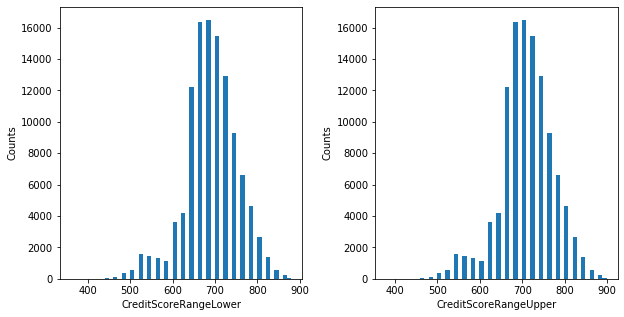

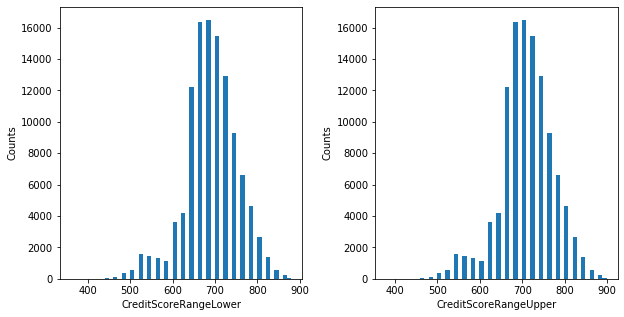

In [23]:
# take a look at CreditScorelower and upper again.

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
bins_edge = np.arange(df_sub.CreditScoreRangeLower.min(), df_sub.CreditScoreRangeLower.max()+10, 10)
plt.hist(data=df_sub, x='CreditScoreRangeLower', bins=bins_edge)
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('Counts');

plt.subplots_adjust(wspace= 0.3)

plt.subplot(1,2,2)
bins_edge = np.arange(df_sub.CreditScoreRangeUpper.min(), df_sub.CreditScoreRangeUpper.max()+10, 10)
plt.hist(data=df_sub, x='CreditScoreRangeUpper', bins=bins_edge)
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('Counts');

The two bounds of credit score is very similar, noting there are gaps between every sub-interval of the graph, this might indicate the credit scores were given with a sepcific range for each.

The credit socres look very normally distributed as well.

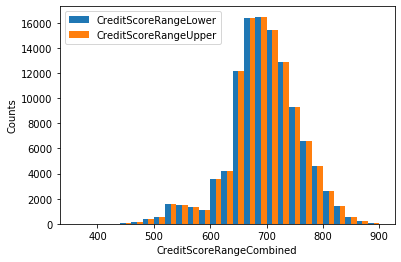

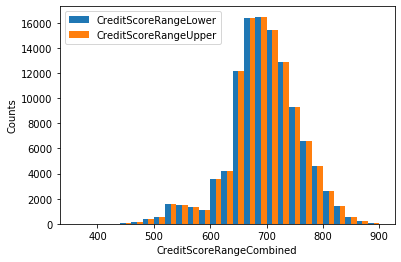

In [24]:
# combine the two plots

bins_edge = np.arange(df_sub.CreditScoreRangeLower.min(), df_sub.CreditScoreRangeUpper.max()+10, 10)
plt.hist(data=df_sub, x='CreditScoreRangeLower', bins=bins_edge)

plt.hist(data=df_sub, x='CreditScoreRangeUpper', bins=bins_edge)
plt.xlabel('CreditScoreRangeCombined')
plt.ylabel('Counts')
plt.legend(['CreditScoreRangeLower', 'CreditScoreRangeUpper']);

Interestingly, thw two graphs fill in each other's gap perfectly, this further indicates the lower and upper bound of credit scores were givien with some certain values.

In [25]:
# take a look at the StatedMonthlyIncome variable
df_sub.StatedMonthlyIncome.describe()

count    1.138040e+05
mean     5.611754e+03
std      7.481310e+03
min      0.000000e+00
25%      3.208333e+03
50%      4.666667e+03
75%      6.833333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

count    1.138040e+05
mean     5.611754e+03
std      7.481310e+03
min      0.000000e+00
25%      3.208333e+03
50%      4.666667e+03
75%      6.833333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [26]:
print(df_sub.query('StatedMonthlyIncome == 0')['Term'].count())
print('{:.5%}'.format(df_sub.query('StatedMonthlyIncome == 0')['Term'].count() / df_sub['Term'].count()))

1393
1.22403%
1393
1.22403%


There are 1393 borrowers with a monthly income of 0, however, it is not significant because it acccounts for only 1.22403% in porpotion of the total.

In [27]:
print(df_sub.query('StatedMonthlyIncome >= 50000')['Term'].count())
print('{:.5%}'.format(df_sub.query('StatedMonthlyIncome >= 50000')['Term'].count() / df_sub['Term'].count()))

91
0.07996%
91
0.07996%


There are 18 borrowers with a monthly income higher than 100000. Altough they might be wrong values, their existence make plotting difficult in the later section. They should better be dropped.

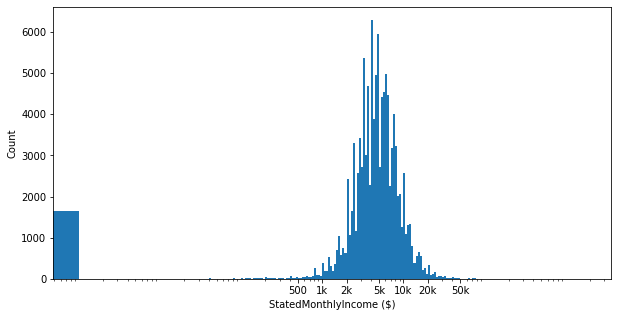

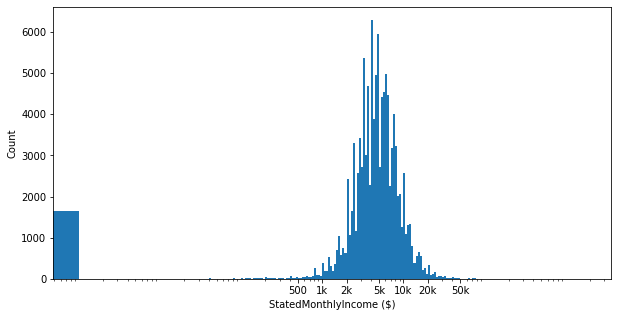

In [28]:
log_binsize = 0.025
bins = 10 ** np.arange(0.0, np.log10(df_sub.StatedMonthlyIncome.max())+log_binsize, log_binsize)

# insert a bin at 0, since there are some values = 0 for StatedMonthlyIncome
bins = list(bins)
bins.insert(0, 0)

plt.figure(figsize= (10, 5))
plt.hist(data=df_sub, x='StatedMonthlyIncome', bins=bins)

# change the graph to log scale
plt.xscale('log');
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [ 500, '1k', '2k', '5k', '10k', '20k', '50k'])

plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('Count');

The majorty of values are normally distributed, however, outliers are significant at around 0 while also some greater than 50k.

In [29]:
df_sub.query('StatedMonthlyIncome == 0')

Term  LoanStatus  BorrowerAPR  BorrowerRate  ProsperScore  \
78       36  Chargedoff      0.18454        0.1700           NaN   
100      36  Chargedoff      0.35356        0.3134           3.0   
108      36   Completed      0.28320        0.2600           NaN   
125      36     Current      0.35643        0.3199           5.0   
170      36   Completed      0.28851        0.2499           5.0   
186      36  Chargedoff      0.35797        0.3177           5.0   
332      36   Cancelled      0.25650        0.2375           NaN   
335      36   Completed      0.35797        0.3177           3.0   
688      36   Completed      0.30532        0.2699           7.0   
772      36   Completed      0.10491        0.0980           NaN   
917      36   Completed      0.15713        0.1500           NaN   
948      36   Completed      0.14770        0.1299           NaN   
954      36   Completed      0.27767        0.2700           NaN   
973      12   Completed      0.30461        0.2254           6.0   
988      36   Completed      0.38443        0.3220           5.0   
1014     36     Current      0.24758        0.2099           6.0   
1157     36   Completed      0.12500        0.1180           NaN   
1314     36     Current      0.31032        0.2712           2.0   
1346     36   Completed      0.37036        0.3500           NaN   
1478     36  Chargedoff      0.19730        0.1900           NaN   
1521     36  Chargedoff      0.14132        0.1200           NaN   
1529     60    Past Due      0.27462        0.2489           7.0   
1557     36     Current      0.35356        0.3134           4.0   
1773     60     Current      0.24702        0.2220           3.0   
1790     36  Chargedoff      0.37453        0.3500           NaN   
1822     36   Completed      0.16991        0.1555           NaN   
1829     36     Current      0.35132        0.3149           4.0   
1844     36   Completed      0.09436        0.0800           NaN   
1926     36  Chargedoff      0.30218        0.2900           NaN   
2064     36   Completed      0.15428        0.1400           NaN   
2331     36     Current      0.35797        0.3177           4.0   
2439     36   Defaulted      0.34815        0.3321           NaN   
2547     36   Completed      0.20412        0.1820           NaN   
2583     36   Completed      0.29776        0.2900           NaN   
2696     36  Chargedoff      0.15629        0.1420           NaN   
2871     36  Chargedoff      0.16115        0.1540           NaN   
2909     36     Current      0.27060        0.2324           5.0   
2967     36  Chargedoff      0.30469        0.2969           NaN   
2985     36   Completed      0.23246        0.2250           NaN   
3055     36  Chargedoff      0.17722        0.1700           NaN   
3151     36   Completed      0.10638        0.0890           NaN   
3152     36     Current      0.29486        0.2561           6.0   
3362     36   Defaulted      0.15629        0.1420           NaN   
3441     36   Defaulted      0.10993        0.1030           NaN   
3452     36  Chargedoff      0.07147        0.0510           NaN   
3514     36   Completed      0.33593        0.3200           NaN   
3574     36     Current      0.27060        0.2324           2.0   
3645     36  Chargedoff      0.35643        0.3199           4.0   
3745     36     Current      0.24758        0.2099           7.0   
3780     36     Current      0.29510        0.2599           5.0   
3852     36     Current      0.35797        0.3177           4.0   
3959     36   Completed      0.15629        0.1420           NaN   
3967     36   Completed      0.35356        0.3134           2.0   
3979     36   Completed      0.36884        0.3444           8.0   
4062     36   Completed      0.35930        0.3350           5.0   
4117     36   Completed      0.25707        0.2495           NaN   
4195     36   Completed      0.24246        0.2049           7.0   
4260     60     Current      0.28930        0.2632           4.

Term  LoanStatus  BorrowerAPR  BorrowerRate  ProsperScore  \
78       36  Chargedoff      0.18454        0.1700           NaN   
100      36  Chargedoff      0.35356        0.3134           3.0   
108      36   Completed      0.28320        0.2600           NaN   
125      36     Current      0.35643        0.3199           5.0   
170      36   Completed      0.28851        0.2499           5.0   
186      36  Chargedoff      0.35797        0.3177           5.0   
332      36   Cancelled      0.25650        0.2375           NaN   
335      36   Completed      0.35797        0.3177           3.0   
688      36   Completed      0.30532        0.2699           7.0   
772      36   Completed      0.10491        0.0980           NaN   
917      36   Completed      0.15713        0.1500           NaN   
948      36   Completed      0.14770        0.1299           NaN   
954      36   Completed      0.27767        0.2700           NaN   
973      12   Completed      0.30461        0.2254           6.0   
988      36   Completed      0.38443        0.3220           5.0   
1014     36     Current      0.24758        0.2099           6.0   
1157     36   Completed      0.12500        0.1180           NaN   
1314     36     Current      0.31032        0.2712           2.0   
1346     36   Completed      0.37036        0.3500           NaN   
1478     36  Chargedoff      0.19730        0.1900           NaN   
1521     36  Chargedoff      0.14132        0.1200           NaN   
1529     60    Past Due      0.27462        0.2489           7.0   
1557     36     Current      0.35356        0.3134           4.0   
1773     60     Current      0.24702        0.2220           3.0   
1790     36  Chargedoff      0.37453        0.3500           NaN   
1822     36   Completed      0.16991        0.1555           NaN   
1829     36     Current      0.35132        0.3149           4.0   
1844     36   Completed      0.09436        0.0800           NaN   
1926     36  Chargedoff      0.30218        0.2900           NaN   
2064     36   Completed      0.15428        0.1400           NaN   
2331     36     Current      0.35797        0.3177           4.0   
2439     36   Defaulted      0.34815        0.3321           NaN   
2547     36   Completed      0.20412        0.1820           NaN   
2583     36   Completed      0.29776        0.2900           NaN   
2696     36  Chargedoff      0.15629        0.1420           NaN   
2871     36  Chargedoff      0.16115        0.1540           NaN   
2909     36     Current      0.27060        0.2324           5.0   
2967     36  Chargedoff      0.30469        0.2969           NaN   
2985     36   Completed      0.23246        0.2250           NaN   
3055     36  Chargedoff      0.17722        0.1700           NaN   
3151     36   Completed      0.10638        0.0890           NaN   
3152     36     Current      0.29486        0.2561           6.0   
3362     36   Defaulted      0.15629        0.1420           NaN   
3441     36   Defaulted      0.10993        0.1030           NaN   
3452     36  Chargedoff      0.07147        0.0510           NaN   
3514     36   Completed      0.33593        0.3200           NaN   
3574     36     Current      0.27060        0.2324           2.0   
3645     36  Chargedoff      0.35643        0.3199           4.0   
3745     36     Current      0.24758        0.2099           7.0   
3780     36     Current      0.29510        0.2599           5.0   
3852     36     Current      0.35797        0.3177           4.0   
3959     36   Completed      0.15629        0.1420           NaN   
3967     36   Completed      0.35356        0.3134           2.0   
3979     36   Completed      0.36884        0.3444           8.0   
4062     36   Completed      0.35930        0.3350           5.0   
4117     36   Completed      0.25707        0.2495           NaN   
4195     36   Completed      0.24246        0.2049           7.0   
4260     60     Current      0.28930        0.2632           4.

These rows seemed to be wrong in the StatedMonthlyIncome values. Many of them are employed of even full-time employed, and how would they have a StatedMonthlyIncome of 0? In addition, many of their credits are above average (>= 650 approximately), it would be hard to have a high credit score without a stable monthly income. Therefore, I would drop all of these rows, as considered them are outliers.

In [30]:
df_sub.drop(index=df_sub.query('StatedMonthlyIncome == 0').index, inplace = True);

In [31]:
df_sub.query('StatedMonthlyIncome >= 50000')

Term  LoanStatus  BorrowerAPR  BorrowerRate  ProsperScore  \
3274     36   Completed      0.06576        0.0590           NaN   
4691     36   Completed      0.12528        0.0974           8.0   
8066     36   Completed      0.35643        0.3199           4.0   
8870     36  Chargedoff      0.12700        0.1200           NaN   
11312    36   Completed      0.08684        0.0800           NaN   
11835    36     Current      0.13697        0.1089           9.0   
13039    36     Current      0.19236        0.1559           4.0   
15035    36     Current      0.14714        0.1189          10.0   
15355    36   Completed      0.18268        0.1645           NaN   
15814    36   Defaulted      0.21739        0.2100           NaN   
17411    36   Completed      0.35643        0.3199           5.0   
17598    36   Completed      0.08684        0.0800           NaN   
20708    36   Completed      0.24758        0.2099           7.0   
21228    36     Current      0.32446        0.2850           2.0   
21250    36   Completed      0.16056        0.1390          10.0   
21983    60     Current      0.13227        0.1099           8.0   
25495    36   Completed      0.20614        0.1988           NaN   
25803    36     Current      0.28032        0.2419           4.0   
27013    36   Completed      0.20200        0.1799           8.0   
28187    36     Current      0.21290        0.1760           4.0   
28298    60     Current      0.20347        0.1795           4.0   
29348    12   Completed      0.17493        0.1177          10.0   
31388    60     Current      0.20040        0.1765           3.0   
32104    12   Completed      0.18829        0.1299           8.0   
34950    60     Current      0.21935        0.1950           4.0   
35218    36   Completed      0.07389        0.0705          10.0   
35833    36     Current      0.18275        0.1465          10.0   
38795    36     Current      0.14162        0.1203           7.0   
40276    36   Completed      0.14448        0.1374           NaN   
44204    36     Current      0.16324        0.1274           7.0   
44367    36     Current      0.16259        0.1264           4.0   
44759    60     Current      0.20808        0.1840           4.0   
45028    36     Current      0.33973        0.2999           2.0   
45563    36     Current      0.21342        0.1765           4.0   
45648    36   Completed      0.09688        0.0900           NaN   
48469    36   Completed      0.35643        0.3199           5.0   
49248    36   Completed      0.13068        0.1095           9.0   
49929    36     Current      0.35797        0.3177           3.0   
50126    36  Chargedoff      0.34577        0.3058           8.0   
51553    36     Current      0.09434        0.0809          11.0   
52293    36     Current      0.12782        0.0999          10.0   
53014    12   Completed      0.25785        0.1795           3.0   
53167    36     Current      0.35797        0.3177           4.0   
53386    36     Current      0.18725        0.1509           5.0   
56431    36   Completed      0.06587        0.0625          10.0   
56867    36   Completed      0.11144        0.1045           NaN   
57133    36     Current      0.35643        0.3199           5.0   
59263    36   Completed      0.27060        0.2324           5.0   
59298    36     Current      0.24246        0.2049           6.0   
59542    60   Completed      0.24282        0.2179           4.0   
59928    36   Completed      0.22135        0.1990           9.0   
60563    36     Current      0.18173        0.1599           9.0   
61443    36   Completed      0.10692        0.1000           NaN   
62274    36   Completed      0.17260        0.1654           NaN   
62864    36   Defaulted      0.15211        0.1450           NaN   
63149    36     Current      0.14857        0.1203           7.0   
63374    36   Completed      0.31053        0.2750           7.0   
63925    36   Completed      0.25948        0.2500           Na

Term  LoanStatus  BorrowerAPR  BorrowerRate  ProsperScore  \
3274     36   Completed      0.06576        0.0590           NaN   
4691     36   Completed      0.12528        0.0974           8.0   
8066     36   Completed      0.35643        0.3199           4.0   
8870     36  Chargedoff      0.12700        0.1200           NaN   
11312    36   Completed      0.08684        0.0800           NaN   
11835    36     Current      0.13697        0.1089           9.0   
13039    36     Current      0.19236        0.1559           4.0   
15035    36     Current      0.14714        0.1189          10.0   
15355    36   Completed      0.18268        0.1645           NaN   
15814    36   Defaulted      0.21739        0.2100           NaN   
17411    36   Completed      0.35643        0.3199           5.0   
17598    36   Completed      0.08684        0.0800           NaN   
20708    36   Completed      0.24758        0.2099           7.0   
21228    36     Current      0.32446        0.2850           2.0   
21250    36   Completed      0.16056        0.1390          10.0   
21983    60     Current      0.13227        0.1099           8.0   
25495    36   Completed      0.20614        0.1988           NaN   
25803    36     Current      0.28032        0.2419           4.0   
27013    36   Completed      0.20200        0.1799           8.0   
28187    36     Current      0.21290        0.1760           4.0   
28298    60     Current      0.20347        0.1795           4.0   
29348    12   Completed      0.17493        0.1177          10.0   
31388    60     Current      0.20040        0.1765           3.0   
32104    12   Completed      0.18829        0.1299           8.0   
34950    60     Current      0.21935        0.1950           4.0   
35218    36   Completed      0.07389        0.0705          10.0   
35833    36     Current      0.18275        0.1465          10.0   
38795    36     Current      0.14162        0.1203           7.0   
40276    36   Completed      0.14448        0.1374           NaN   
44204    36     Current      0.16324        0.1274           7.0   
44367    36     Current      0.16259        0.1264           4.0   
44759    60     Current      0.20808        0.1840           4.0   
45028    36     Current      0.33973        0.2999           2.0   
45563    36     Current      0.21342        0.1765           4.0   
45648    36   Completed      0.09688        0.0900           NaN   
48469    36   Completed      0.35643        0.3199           5.0   
49248    36   Completed      0.13068        0.1095           9.0   
49929    36     Current      0.35797        0.3177           3.0   
50126    36  Chargedoff      0.34577        0.3058           8.0   
51553    36     Current      0.09434        0.0809          11.0   
52293    36     Current      0.12782        0.0999          10.0   
53014    12   Completed      0.25785        0.1795           3.0   
53167    36     Current      0.35797        0.3177           4.0   
53386    36     Current      0.18725        0.1509           5.0   
56431    36   Completed      0.06587        0.0625          10.0   
56867    36   Completed      0.11144        0.1045           NaN   
57133    36     Current      0.35643        0.3199           5.0   
59263    36   Completed      0.27060        0.2324           5.0   
59298    36     Current      0.24246        0.2049           6.0   
59542    60   Completed      0.24282        0.2179           4.0   
59928    36   Completed      0.22135        0.1990           9.0   
60563    36     Current      0.18173        0.1599           9.0   
61443    36   Completed      0.10692        0.1000           NaN   
62274    36   Completed      0.17260        0.1654           NaN   
62864    36   Defaulted      0.15211        0.1450           NaN   
63149    36     Current      0.14857        0.1203           7.0   
63374    36   Completed      0.31053        0.2750           7.0   
63925    36   Completed      0.25948        0.2500           Na

These rows seem not to be wrong, as the variables all look valid. Nevertheless, just as stated above, their existence affect the drawing of correlation graphs in the later section, it is not ideal to plot with such great outliers. Hence all `StatedMonthlyIncome >= 50000` can be dropped, they are really too far from majority of values.

In [32]:
df_sub.drop(index=df_sub.query('StatedMonthlyIncome >= 50000').index, inplace = True);

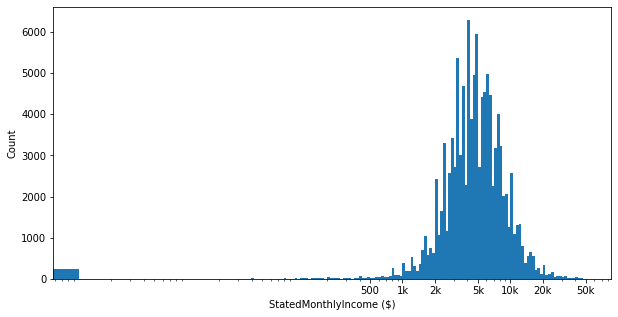

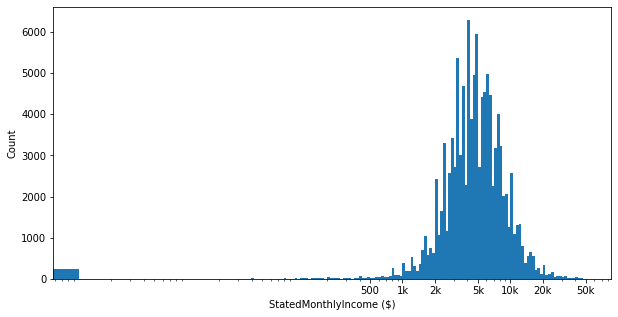

In [33]:
# plot the StatedMonthlyIncome again
log_binsize = 0.025
bins = 10 ** np.arange(0.0, np.log10(df_sub.StatedMonthlyIncome.max())+log_binsize, log_binsize)

# insert a bin at 0, since there are some values = 0 for StatedMonthlyIncome
bins = list(bins)
bins.insert(0, 0)

plt.figure(figsize= (10, 5))
plt.hist(data=df_sub, x='StatedMonthlyIncome', bins=bins)

# change the graph to log scale
plt.xscale('log');
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [ 500, '1k', '2k', '5k', '10k', '20k', '50k'])

plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('Count');

There is still a group of outliers around 0, but fewer than before, take a look at them.

In [34]:
df_sub.query('StatedMonthlyIncome <= 200')

Term  LoanStatus  BorrowerAPR  BorrowerRate  ProsperScore  \
22       36     Current      0.35356        0.3134           2.0   
146      36   Completed      0.09939        0.0925           NaN   
184      36   Defaulted      0.26590        0.2500           NaN   
226      36   Completed      0.11749        0.1000           NaN   
576      36   Completed      0.10505        0.0935           NaN   
626      36     Current      0.35797        0.3177           4.0   
895      36  Chargedoff      0.35797        0.3177           4.0   
1242     36   Completed      0.11415        0.1072           NaN   
1356     36   Completed      0.14982        0.1284           NaN   
1925     36   Defaulted      0.08684        0.0800           NaN   
2089     12   Defaulted      0.35843        0.2669           4.0   
2138     36   Completed      0.23250        0.2100           NaN   
2217     36   Completed      0.16436        0.1572           NaN   
2394     36   Defaulted      0.18726        0.1800           NaN   
2452     36     Current      0.28851        0.2499           6.0   
2712     36   Completed      0.20936        0.2020           NaN   
2715     36   Completed      0.18224        0.1750           NaN   
3174     36    Past Due      0.35643        0.3199           4.0   
3300     36  Chargedoff      0.35797        0.3177           4.0   
3339     36  Chargedoff      0.21739        0.2100           NaN   
3494     36  Chargedoff      0.22744        0.2200           NaN   
4424     36   Completed      0.13705        0.1300           NaN   
4786     36   Completed      0.10542        0.0985           NaN   
4827     36   Completed      0.08971        0.0725           NaN   
4968     36   Defaulted      0.18726        0.1800           NaN   
5154     36     Current      0.35285        0.3127           3.0   
5186     36   Completed      0.15713        0.1500           NaN   
5567     36   Defaulted      0.23748        0.2300           NaN   
5743     36   Completed      0.15412        0.1470           NaN   
5806     36   Completed      0.35797        0.3177           3.0   
5961     36  Chargedoff      0.08971        0.0725           NaN   
5976     36   Defaulted      0.15428        0.1400           NaN   
6965     36   Defaulted      0.20735        0.2000           NaN   
7086     36   Completed      0.29776        0.2900           NaN   
7608     36  Chargedoff      0.07045        0.0500           NaN   
7836     36     Current      0.35797        0.3177           3.0   
7856     36   Completed      0.15878        0.1495           NaN   
7871     36     Current      0.35797        0.3177           4.0   
7872     60     Current      0.27246        0.2468           7.0   
8010     36  Chargedoff      0.30564        0.2900           NaN   
8054     36  Chargedoff      0.13453        0.1275           NaN   
8093     36   Defaulted      0.27767        0.2700           NaN   
8246     36  Chargedoff      0.15713        0.1500           NaN   
8449     36   Completed      0.28545        0.2700           NaN   
8462     36   Completed      0.16767        0.1605           NaN   
8501     36   Completed      0.13855        0.1315           NaN   
8748     36  Chargedoff      0.35858        0.3220           6.0   
8829     36   Completed      0.25757        0.2500           NaN   
8936     36     Current      0.35356        0.3134           4.0   
9410     36   Completed      0.28771        0.2800           NaN   
9972     36  Chargedoff      0.16991        0.1555           NaN   
10009    36  Chargedoff      0.19730        0.1900           NaN   
10018    36     Current      0.32538        0.2859           2.0   
10432    36   Completed      0.10692        0.1000           NaN   
10567    36   Defaulted      0.15286        0.1350           NaN   
10925    36  Chargedoff      0.14984        0.1350           NaN   
10969    36     Current      0.35356        0.3134           2.0   
11091    36  Chargedoff      0.18224        0.1750           Na

Term  LoanStatus  BorrowerAPR  BorrowerRate  ProsperScore  \
22       36     Current      0.35356        0.3134           2.0   
146      36   Completed      0.09939        0.0925           NaN   
184      36   Defaulted      0.26590        0.2500           NaN   
226      36   Completed      0.11749        0.1000           NaN   
576      36   Completed      0.10505        0.0935           NaN   
626      36     Current      0.35797        0.3177           4.0   
895      36  Chargedoff      0.35797        0.3177           4.0   
1242     36   Completed      0.11415        0.1072           NaN   
1356     36   Completed      0.14982        0.1284           NaN   
1925     36   Defaulted      0.08684        0.0800           NaN   
2089     12   Defaulted      0.35843        0.2669           4.0   
2138     36   Completed      0.23250        0.2100           NaN   
2217     36   Completed      0.16436        0.1572           NaN   
2394     36   Defaulted      0.18726        0.1800           NaN   
2452     36     Current      0.28851        0.2499           6.0   
2712     36   Completed      0.20936        0.2020           NaN   
2715     36   Completed      0.18224        0.1750           NaN   
3174     36    Past Due      0.35643        0.3199           4.0   
3300     36  Chargedoff      0.35797        0.3177           4.0   
3339     36  Chargedoff      0.21739        0.2100           NaN   
3494     36  Chargedoff      0.22744        0.2200           NaN   
4424     36   Completed      0.13705        0.1300           NaN   
4786     36   Completed      0.10542        0.0985           NaN   
4827     36   Completed      0.08971        0.0725           NaN   
4968     36   Defaulted      0.18726        0.1800           NaN   
5154     36     Current      0.35285        0.3127           3.0   
5186     36   Completed      0.15713        0.1500           NaN   
5567     36   Defaulted      0.23748        0.2300           NaN   
5743     36   Completed      0.15412        0.1470           NaN   
5806     36   Completed      0.35797        0.3177           3.0   
5961     36  Chargedoff      0.08971        0.0725           NaN   
5976     36   Defaulted      0.15428        0.1400           NaN   
6965     36   Defaulted      0.20735        0.2000           NaN   
7086     36   Completed      0.29776        0.2900           NaN   
7608     36  Chargedoff      0.07045        0.0500           NaN   
7836     36     Current      0.35797        0.3177           3.0   
7856     36   Completed      0.15878        0.1495           NaN   
7871     36     Current      0.35797        0.3177           4.0   
7872     60     Current      0.27246        0.2468           7.0   
8010     36  Chargedoff      0.30564        0.2900           NaN   
8054     36  Chargedoff      0.13453        0.1275           NaN   
8093     36   Defaulted      0.27767        0.2700           NaN   
8246     36  Chargedoff      0.15713        0.1500           NaN   
8449     36   Completed      0.28545        0.2700           NaN   
8462     36   Completed      0.16767        0.1605           NaN   
8501     36   Completed      0.13855        0.1315           NaN   
8748     36  Chargedoff      0.35858        0.3220           6.0   
8829     36   Completed      0.25757        0.2500           NaN   
8936     36     Current      0.35356        0.3134           4.0   
9410     36   Completed      0.28771        0.2800           NaN   
9972     36  Chargedoff      0.16991        0.1555           NaN   
10009    36  Chargedoff      0.19730        0.1900           NaN   
10018    36     Current      0.32538        0.2859           2.0   
10432    36   Completed      0.10692        0.1000           NaN   
10567    36   Defaulted      0.15286        0.1350           NaN   
10925    36  Chargedoff      0.14984        0.1350           NaN   
10969    36     Current      0.35356        0.3134           2.0   
11091    36  Chargedoff      0.18224        0.1750           Na

Many of these incomes are problematic, values like: **0.083333**, **3.333333**, **9.416667** **2.500000** appeared in these rows. Does these look like realistic incomes? Especially for **0.083333**, which showed up multiple times in these rows, it is more possible to be a input error rather than real values. Therefore, all of these rows could be dropped, as they are either outliers or wrong values.

In [35]:
df_sub.drop(index=df_sub.query('StatedMonthlyIncome <= 200').index, inplace=True)

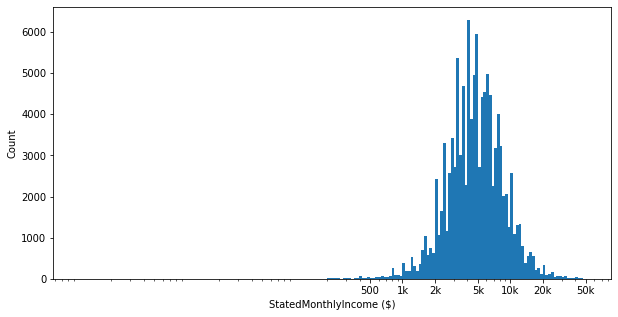

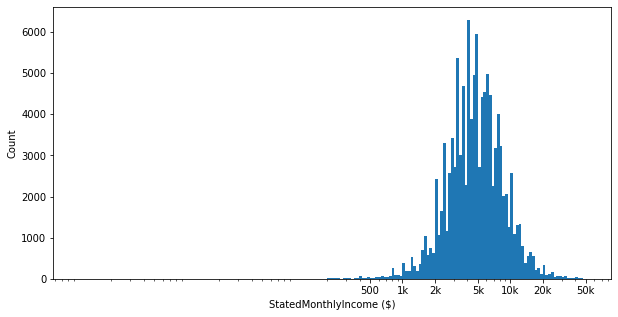

In [36]:
# plot the StatedMonthlyIncome again
log_binsize = 0.025
bins = 10 ** np.arange(0.0, np.log10(df_sub.StatedMonthlyIncome.max())+log_binsize, log_binsize)

# insert a bin at 0, since there are some values = 0 for StatedMonthlyIncome
bins = list(bins)
bins.insert(0, 0)

plt.figure(figsize= (10, 5))
plt.hist(data=df_sub, x='StatedMonthlyIncome', bins=bins)

# change the graph to log scale
plt.xscale('log');
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [ 500, '1k', '2k', '5k', '10k', '20k', '50k'])

plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('Count');

This time the graph looks better in distribution with no visible outliers.

Take a look at the `PercentFunded` variable, it refers to the amound of loan that were funded to a borrower.

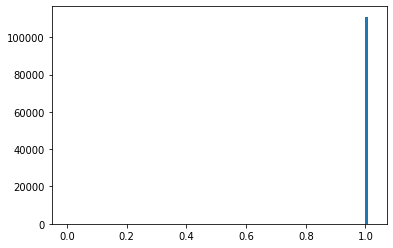

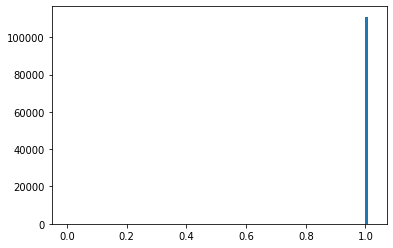

In [37]:
# plot the distribution of PercentFunded
bins_edge =  np.arange(0, df_sub.PercentFunded.max() + 0.01, 0.01)
plt.hist(data=df_sub, x='PercentFunded', bins=bins_edge);

In [38]:
print(df_sub.query('0.99 <= PercentFunded <= 1.01')['Term'].count())
print('{:.5%}'.format(df_sub.query('0.99 <= PercentFunded <= 1.01')['Term'].count() / df_sub['Term'].count()))

110995
99.26309%
110995
99.26309%


The vast majority of PercentFunded is in the interval between 0.99 and 1.01. The variable is so concentrated and would less of interest in later analysis. 

 Take a look at the `Recommendations` variable.

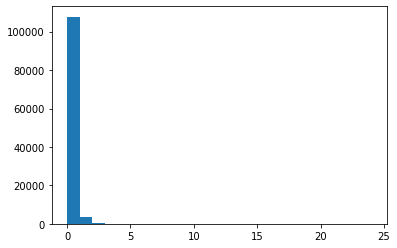

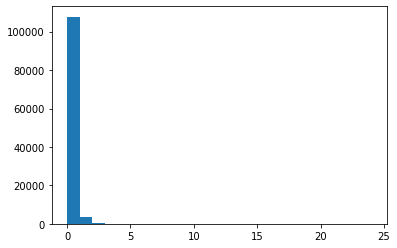

In [39]:
bins_edge = np.arange(0, df_sub.Recommendations.max()+1, 1)
plt.hist(data=df_sub, x='Recommendations', bins=bins_edge);

In [40]:
print(df_sub.query('Recommendations == 0')['Term'].count())
print('{:.5%}'.format(df_sub.query('Recommendations == 0')['Term'].count() / df_sub['Term'].count()))

107778
96.38612%
107778
96.38612%


More than 96% of the `Recommendations` are 0, again, the variable would be less of interest in further analysis.

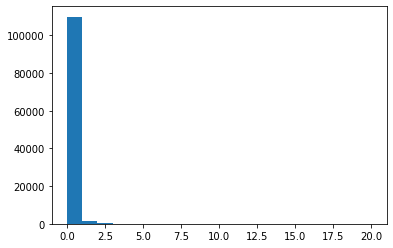

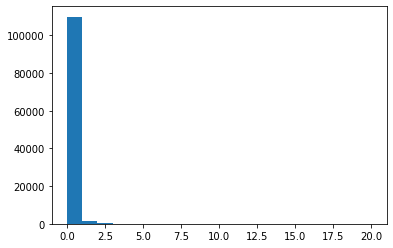

In [41]:
bins_edge = np.arange(0, df_sub.InvestmentFromFriendsCount.max()+1, 1)
plt.hist(data=df_sub, x='InvestmentFromFriendsCount', bins=bins_edge);

In [42]:
print(df_sub.query('InvestmentFromFriendsCount == 0')['Term'].count())
print('{:.5%}'.format(df_sub.query('InvestmentFromFriendsCount == 0')['Term'].count() / df_sub['Term'].count()))

109843
98.23286%
109843
98.23286%


Similarly, 98% of `InvestmentFromFriendsCount` is 0, which makes the variable less of further interest.

Next up, `ProsperScore`.

It would be better to categorize `ProsperScore`.

In [43]:
df_sub['ProsperScore'] = df_sub['ProsperScore'].astype('category')

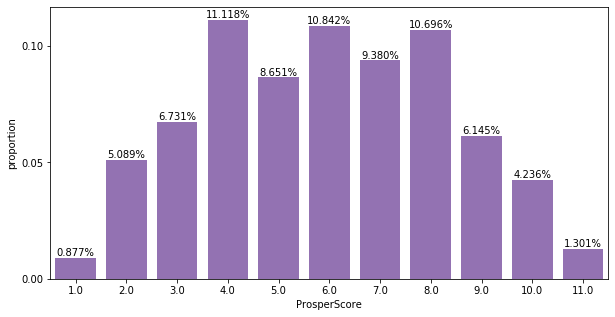

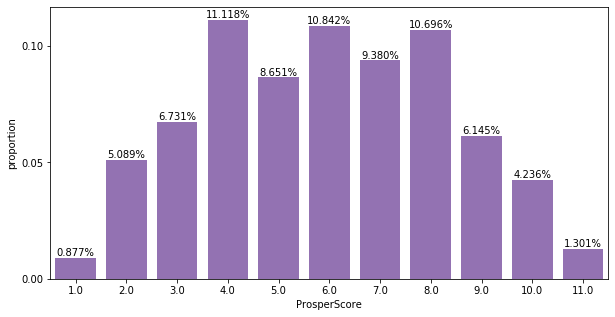

In [44]:
# get the relative frequency of ProsperScore, i.e., by proportion
n_points = df_sub.shape[0]
max_count = df_sub['ProsperScore'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize=(10,5))
sb.countplot(data = df_sub, x = 'ProsperScore', color = base_color, )
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

locs, labels = plt.xticks() # get the current tick locations and labels

# also loops over the value_counts series
j = 1

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = df_sub['ProsperScore'].value_counts()[j]
    pct_string = '{:0.3f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count+100, pct_string, ha = 'center', color = 'black')

    j += 1

Finally, `BorrowerAPR` and `BorrowerRate` are anlayzed, they would be the 'to-indicators' like `LoanStatus` (means using other variables to determine them).

In [45]:
df_sub.head(10)

Term LoanStatus  BorrowerAPR  BorrowerRate ProsperScore EmploymentStatus  \
0   36  Completed      0.16516        0.1580          NaN    Self-employed   
1   36    Current      0.12016        0.0920          7.0         Employed   
2   36  Completed      0.28269        0.2750          NaN    Not available   
3   36    Current      0.12528        0.0974          9.0         Employed   
4   36    Current      0.24614        0.2085          4.0         Employed   
5   60    Current      0.15425        0.1314         10.0         Employed   
6   36    Current      0.31032        0.2712          2.0         Employed   
7   36    Current      0.23939        0.2019          4.0         Employed   
8   36    Current      0.07620        0.0629          9.0         Employed   
9   36    Current      0.07620        0.0629         11.0         Employed   

   IsBorrowerHomeowner  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                 True                  640.0                  659.0   
1                False                  680.0                  699.0   
2                False                  480.0                  499.0   
3                 True                  800.0                  819.0   
4                 True                  680.0                  699.0   
5                 True                  740.0                  759.0   
6                False                  680.0                  699.0   
7                False                  700.0                  719.0   
8                 True                  820.0                  839.0   
9                 True                  820.0                  839.0   

   StatedMonthlyIncome  PercentFunded  Recommendations  \
0          3083.333333            1.0                0   
1          6125.000000            1.0                0   
2          2083.333333            1.0                0   
3          2875.000000            1.0                0   
4          9583.333333            1.0                0   
5          8333.333333            1.0                0   
6          2083.333333            1.0                0   
7          3355.750000            1.0                0   
8          3333.333333            1.0                0   
9          3333.333333            1.0                0   

   InvestmentFromFriendsCount  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0

Term LoanStatus  BorrowerAPR  BorrowerRate ProsperScore EmploymentStatus  \
0   36  Completed      0.16516        0.1580          NaN    Self-employed   
1   36    Current      0.12016        0.0920          7.0         Employed   
2   36  Completed      0.28269        0.2750          NaN    Not available   
3   36    Current      0.12528        0.0974          9.0         Employed   
4   36    Current      0.24614        0.2085          4.0         Employed   
5   60    Current      0.15425        0.1314         10.0         Employed   
6   36    Current      0.31032        0.2712          2.0         Employed   
7   36    Current      0.23939        0.2019          4.0         Employed   
8   36    Current      0.07620        0.0629          9.0         Employed   
9   36    Current      0.07620        0.0629         11.0         Employed   

   IsBorrowerHomeowner  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                 True                  640.0                  659.0   
1                False                  680.0                  699.0   
2                False                  480.0                  499.0   
3                 True                  800.0                  819.0   
4                 True                  680.0                  699.0   
5                 True                  740.0                  759.0   
6                False                  680.0                  699.0   
7                False                  700.0                  719.0   
8                 True                  820.0                  839.0   
9                 True                  820.0                  839.0   

   StatedMonthlyIncome  PercentFunded  Recommendations  \
0          3083.333333            1.0                0   
1          6125.000000            1.0                0   
2          2083.333333            1.0                0   
3          2875.000000            1.0                0   
4          9583.333333            1.0                0   
5          8333.333333            1.0                0   
6          2083.333333            1.0                0   
7          3355.750000            1.0                0   
8          3333.333333            1.0                0   
9          3333.333333            1.0                0   

   InvestmentFromFriendsCount  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0

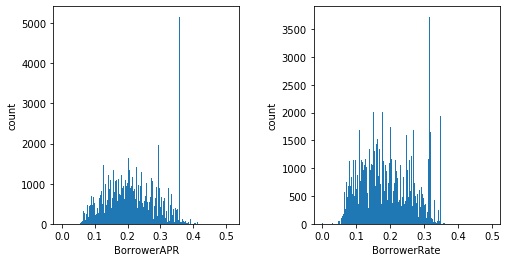

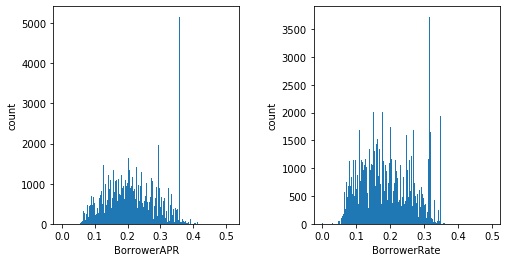

In [46]:
# plot the distributions of BorrowerAPR and BorrowerRate
plt.figure(figsize=(8,4))

bins_edge = np.arange(0, df_sub.BorrowerAPR.max()+0.002, 0.002)
plt.subplot(1,2,1)
plt.hist(data=df_sub, x='BorrowerAPR', bins=bins_edge)
plt.xlabel('BorrowerAPR')
plt.ylabel('count')

plt.subplots_adjust(wspace=0.4)

bins_edge = np.arange(0, df_sub.BorrowerRate.max()+0.002, 0.002)
plt.subplot(1,2,2)
plt.hist(data=df_sub, x='BorrowerRate', bins=bins_edge)
plt.xlabel('BorrowerRate')
plt.ylabel('count');

The two distributions look very similar, and they have a extremly high count at around 0.35 and 0.3 respectively. 

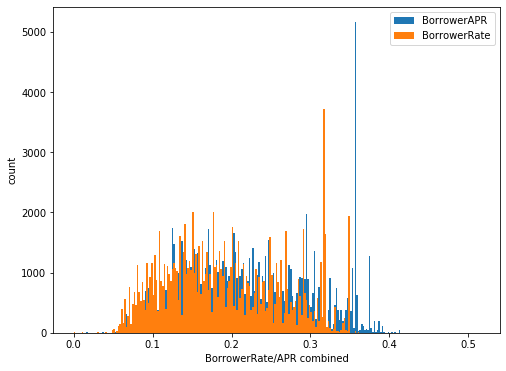

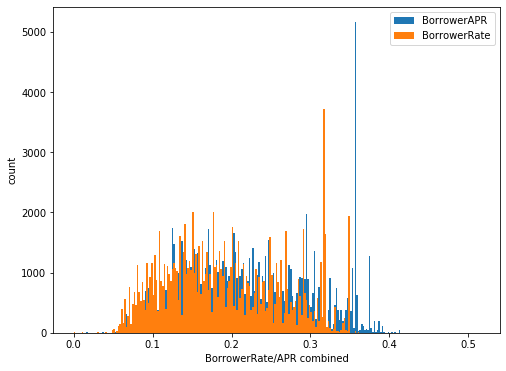

In [47]:
# combine the two plots
plt.figure(figsize=(8,6))
bins_edge = np.arange(0, df_sub.BorrowerAPR.max()+0.002, 0.002)
plt.hist(data=df_sub, x='BorrowerAPR', bins=bins_edge)

bins_edge = np.arange(0, df_sub.BorrowerRate.max()+0.002, 0.002)
plt.hist(data=df_sub, x='BorrowerRate', bins=bins_edge)
plt.xlabel('BorrowerRate/APR combined')
plt.ylabel('count')
plt.legend(['BorrowerAPR', 'BorrowerRate']);

Not surprisingly, the two graphs look very alike.

#### The `StatedMonthlyIncome` took a very long range of values, as such a log transform was applied. After the transformation ,the variable looks to be normally distributed, but still with a extremely long tail in both directions.

#### During the above process, many invalid income values were found, and were excluded from the dataset, a significant amount of outliers were thus removed. This is important for bivariate and multivariate analysis in the later part, because those values would enormously drag the average income low.

#### Briefly, after the univariate exploration, three variables were deemed to be less value of analysis, and would not be used in the next part. They are: 
#### `PercentFunded`, `Recommendations`, `InvestmentFromFriendsCount`.

#### The rest will be used to move forwards are:

#### `Term`, `LoanStatus`, `BorrowerAPR`, `BorrowerRate`, `EmploymentStatus`, `IsBorrowerHomeowner`,

#### `CreditScoreRangeLower`, `ProsperScore`, `CreditScoreRangeUpper`,  and `StatedMonthlyIncome` (10 variables in total). 

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data.

#### This part will focus on the relationship between: first, `BorrowerAPR` and `BorrowerRate` and the other variables, to dig out the

#### determinants of brrowers' interest rate; second, `LoanStatus`and the other variables, to dig out what would be the potential reason for a loan to go bad.

#### I will start with `BorrowerAPR` and `BorrowerRate` (`Borrowers rate`).

In [48]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
                'StatedMonthlyIncome']
categoric_vars = ['Term', 'LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner', 'ProsperScore']

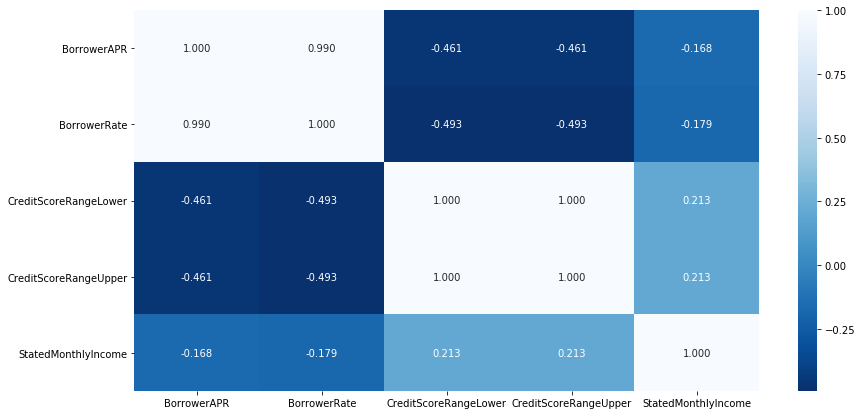

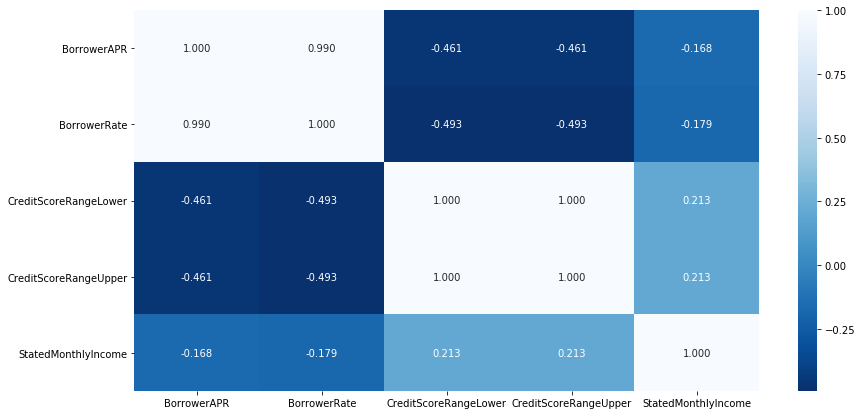

In [49]:
# correlation plot
plt.figure(figsize = [14, 7])
sb.heatmap(df_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'Blues_r', center = 0.25)
plt.show()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value en

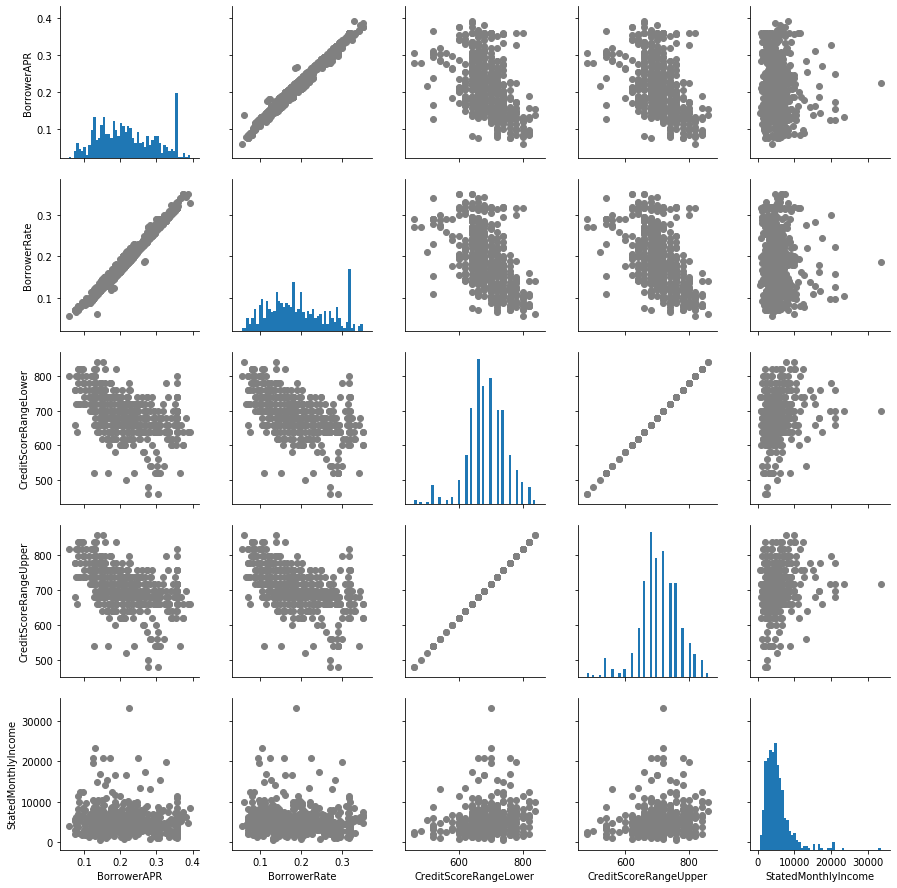

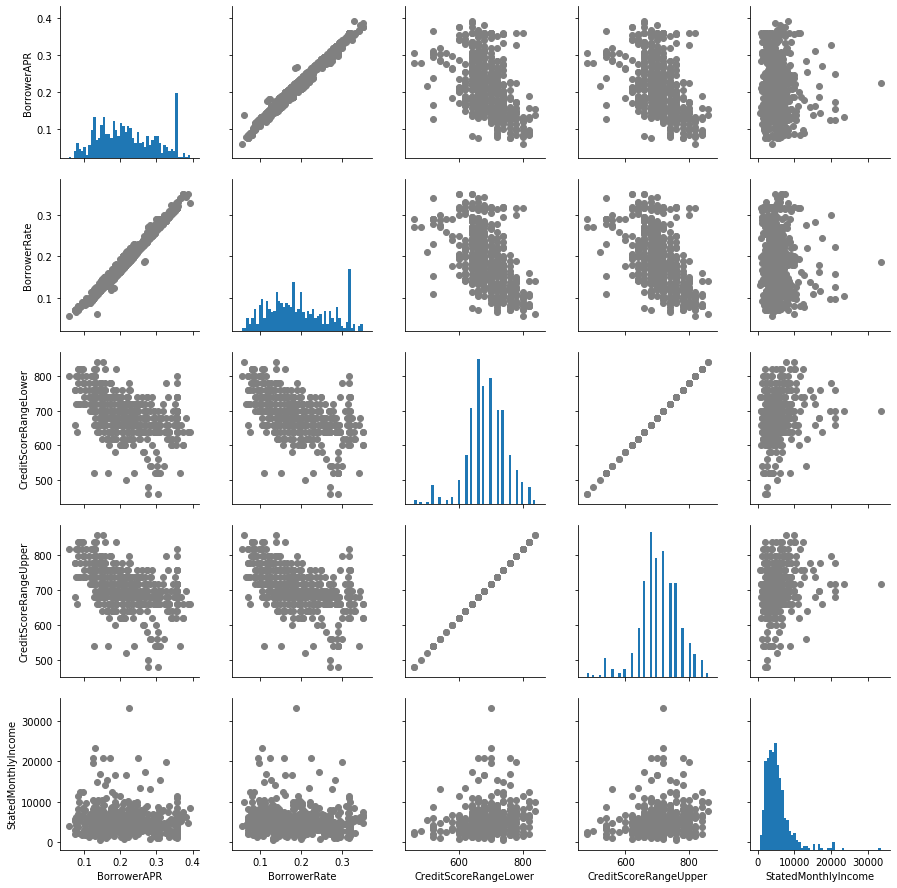

In [50]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(df_sub.shape[0], 500, replace = False)
df_sub_samp = df_sub.loc[samples,:]

g = sb.PairGrid(data = df_sub_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 50);
g.map_offdiag(plt.scatter, color='Grey');

As observed from above, there is a moderate negative raltionship between the `two credit score bounds` and the two `borrorwers rate`. Meanwhile, the two pairs of vriables are almost podtively related to each other perfectly. The rest numeric variabels are not as related to the two `borrorwers rate`.

Let's see how `borrowers rate` interact with other categorical variables.

First off, see how `ProsperScore`, `Term`, `EmploymentStatus`, and `IsBorrowerHomeowner` relates to `borrowers rate`.

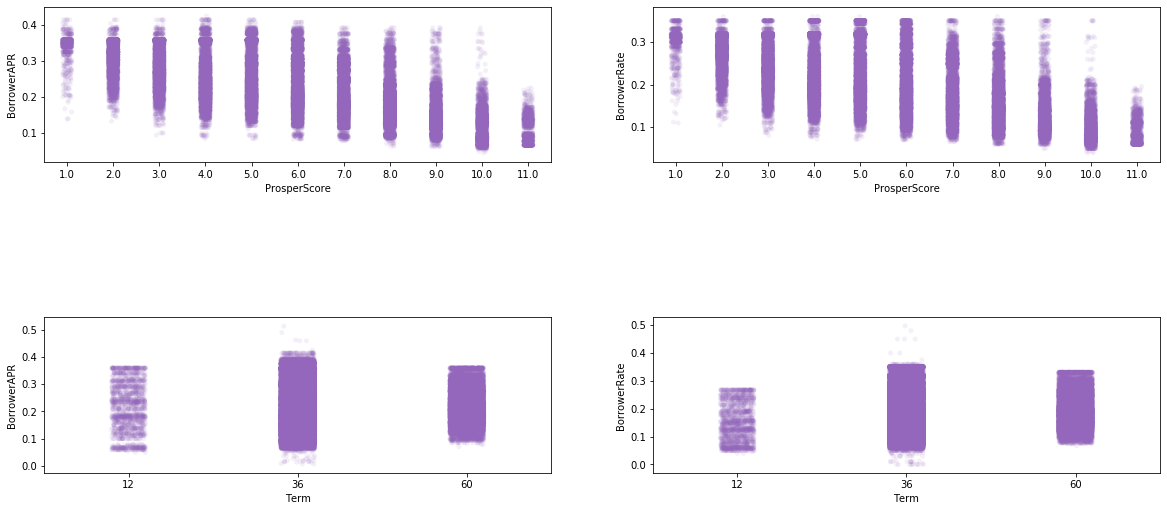

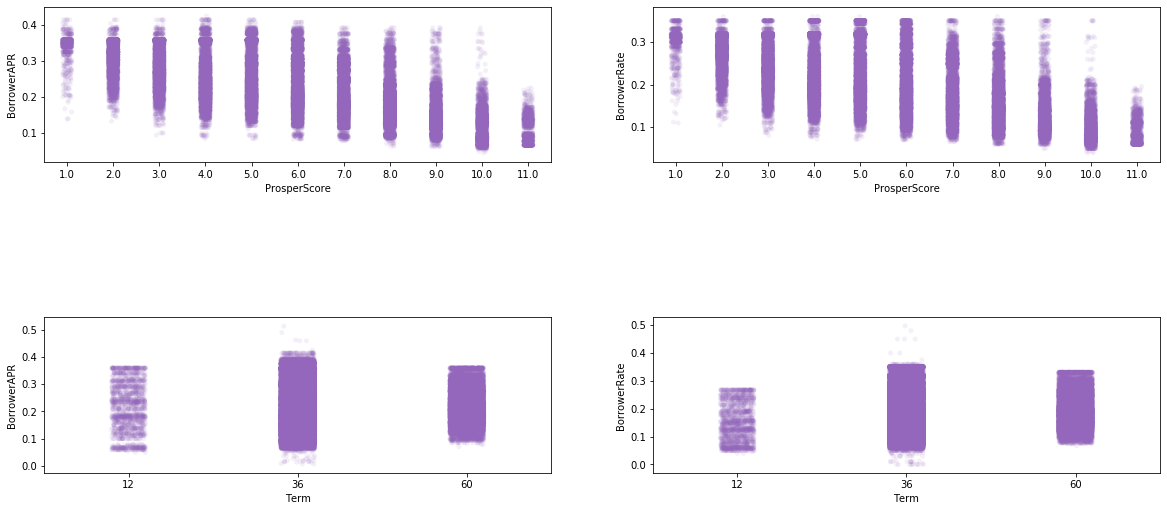

In [51]:
# plot matrix of Borrowers rate against categorical features.
i = 1
def scattergrid(x, y, **kwargs):
    """ Quick hack for creating scatter plots with pyplot's subplot. """
    
    
    global i
    plt.subplot(4,2,i)
    plt.subplots_adjust(wspace=0.2, hspace= 1, )
    sb.stripplot(x, y, color = base_color, alpha = 0.1)
    i += 1

plt.figure(figsize=(20, 20))
scattergrid(df_sub.ProsperScore, df_sub.BorrowerAPR)
scattergrid(df_sub.ProsperScore, df_sub.BorrowerRate)
scattergrid(df_sub.Term, df_sub.BorrowerAPR)
scattergrid(df_sub.Term, df_sub.BorrowerRate)
i = 1

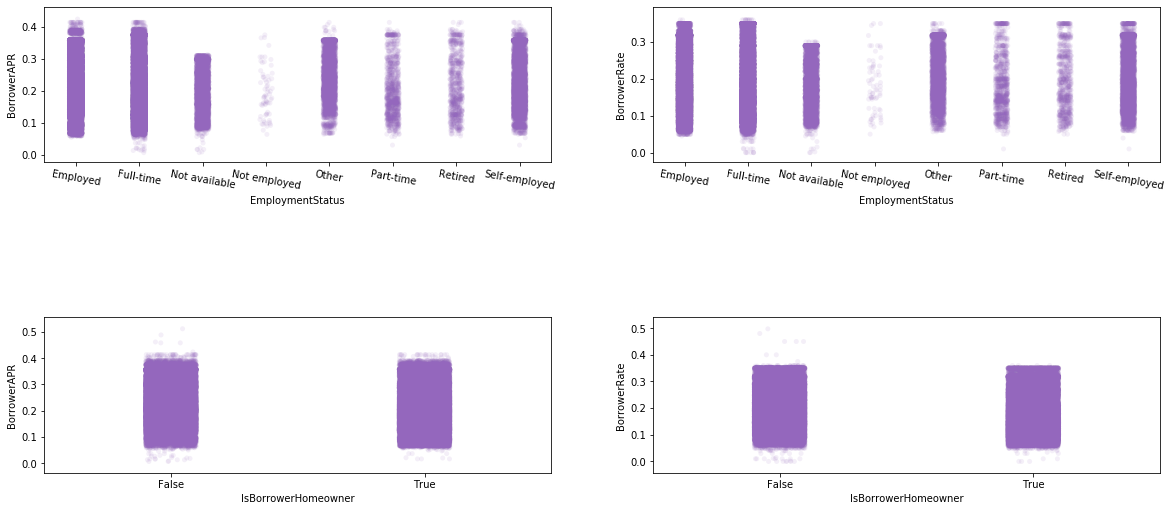

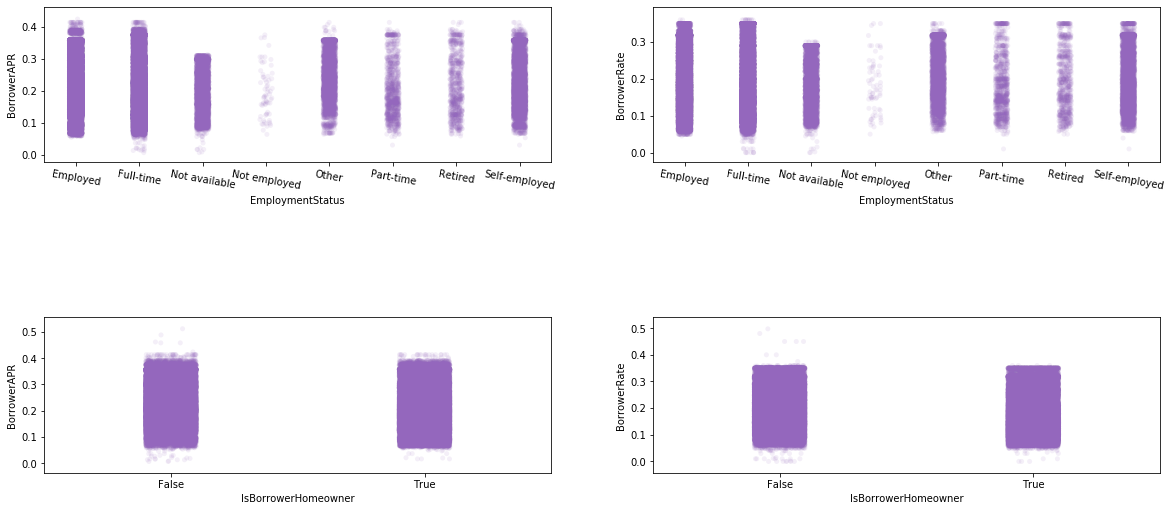

In [52]:
i = 1
plt.figure(figsize=(20, 20))
scattergrid(df_sub.EmploymentStatus, df_sub.BorrowerAPR)
plt.xticks(rotation = -10)
scattergrid(df_sub.EmploymentStatus, df_sub.BorrowerRate)
plt.xticks(rotation = -10)
scattergrid(df_sub.IsBorrowerHomeowner, df_sub.BorrowerAPR)
scattergrid(df_sub.IsBorrowerHomeowner, df_sub.BorrowerRate);

As observed from above, `ProsperScore` seemed to be negatively related to the two `borrowers rate`. When `ProsperScore` was as low as 1.0, typical `borrowers rate` went up high to 3.0. In the middle, however, `Borrowers rate` could take a wide range of vlaue, from 0.1 to 0.3.

The other variables like `Term`, `EmploymentStatus`, and `IsBorrowerHomeowner`, do not have a visible correlation with `Borrowers rate`.

#### The disciussion will now shift from `BorrowerAPR` and `BorrowerRate` to `LoanStatus`, to see how other variables interact with it.

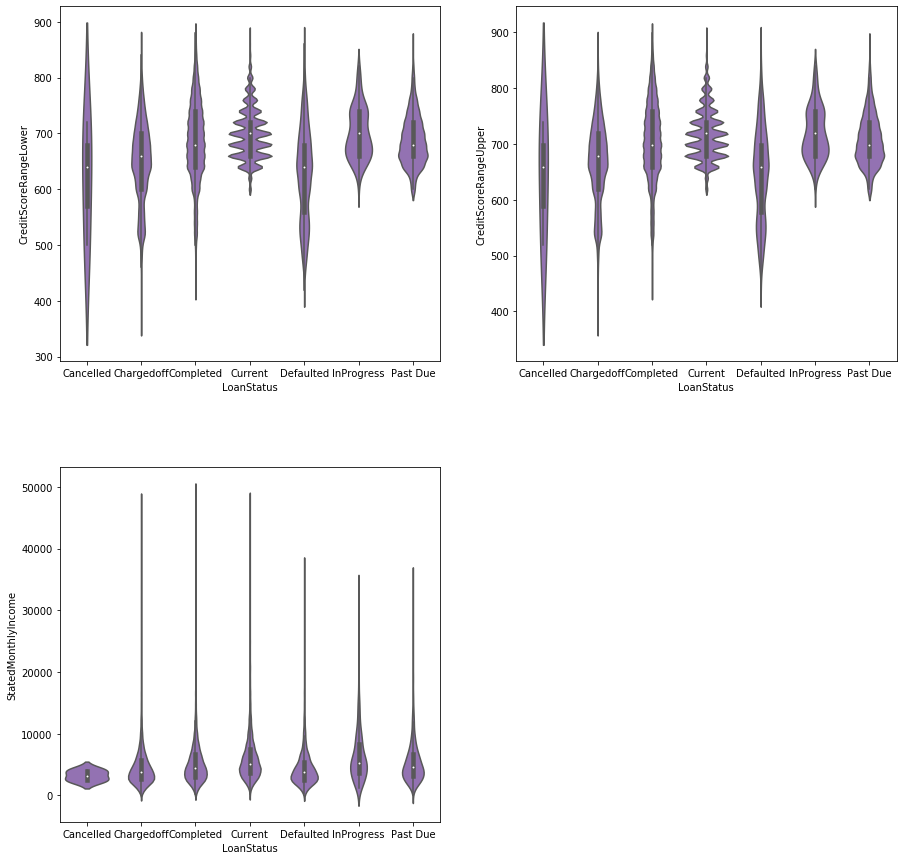

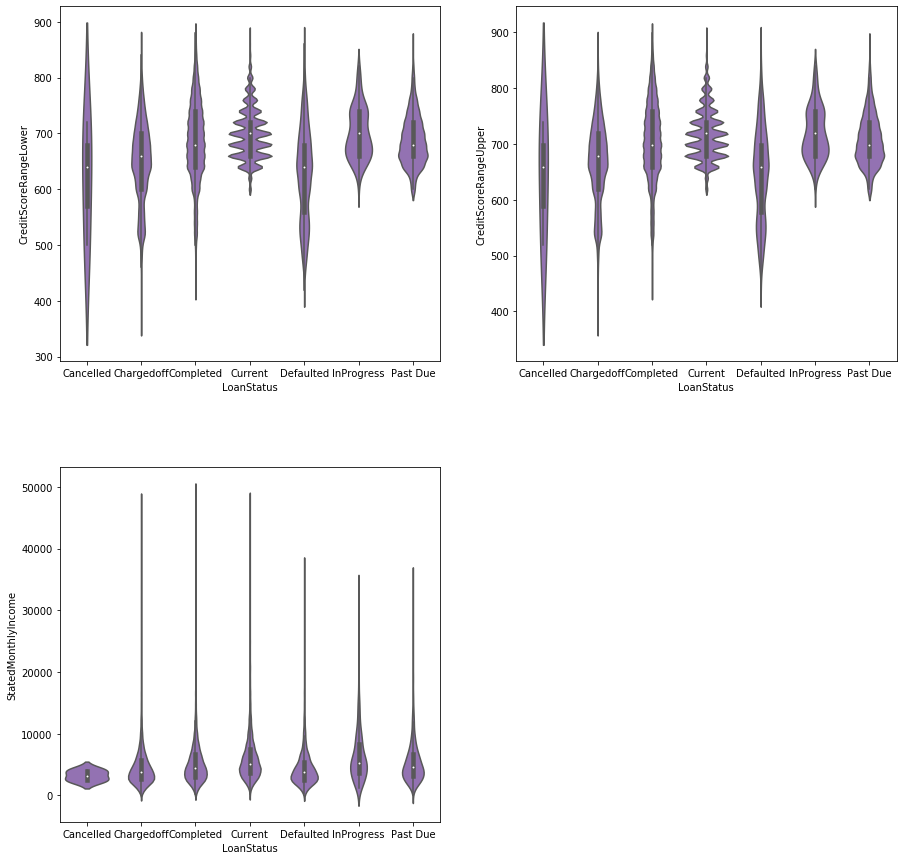

In [53]:
# plot matrix of LoanStatus against numeric features.
i = 1
def Boxgrid(x, y, **kwargs):
    """ Quick hack for creating scatter plots with pyplot's subpplot """
    
    
    global i
    plt.subplot(2,2,i)
    plt.subplots_adjust(wspace=0.2, hspace= 0.3, )
    sb.violinplot(x, y, color = base_color)
    i += 1

plt.figure(figsize=(15, 15))
Boxgrid(df_sub.LoanStatus, df_sub.CreditScoreRangeLower)
Boxgrid(df_sub.LoanStatus, df_sub.CreditScoreRangeUpper)
Boxgrid(df_sub.LoanStatus, df_sub.StatedMonthlyIncome)
i = 1

Just as expected, the `CreditScore Bounds` has wave-like distribution, this is most visible in the **Current** `LoanStatus`. And not suprisingly, the **Defaulted**, **Cancelled**, **Chargedoff** and **Past Due**  `LoanStatus`, which all are bad loans, have a lower median `CreditScore Bounds` than the **Current** and **InProgress** LoanStatus, which are good loans (or about to be good loans). This might reveal that good debts came from a high credit score borrower on average.

Despite the extremely long tails (indicates great outliers) in `StatedMonthlyIncome`, it is still visible that the **Current** and **InProgress** `LoanStatus` have a higher income in medians. 

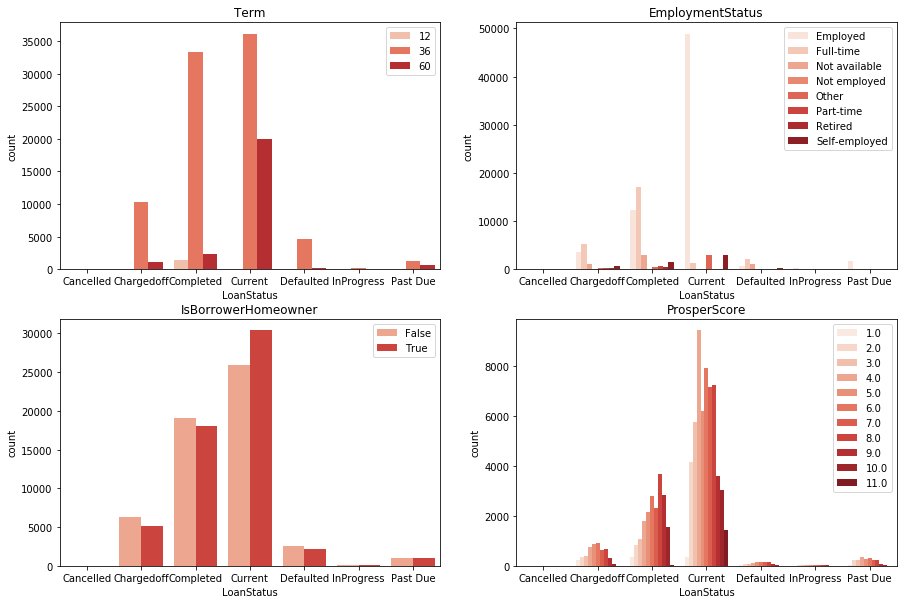

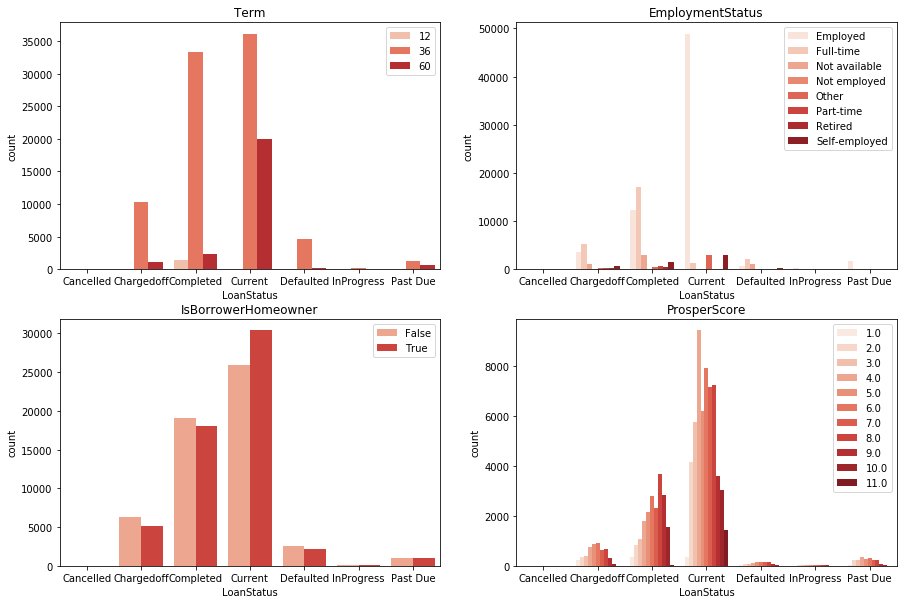

In [54]:
# plot matrix of LoanStatus against categorical features.

i = 1
def Countgrid(x, hue, subtitile, **kwargs):
    """ Quick hack for creating counts plots with pyplot's subplot. """
    
    
    global i
    plt.subplot(2,2,i)
    plt.subplots_adjust(wspace=0.2, hspace= 0.2, )
    sb.countplot(x, hue=hue, palette='Reds')
    plt.legend(loc=1)
    plt.gca().set_title(subtitile)
    i += 1
    
plt.figure(figsize=(15, 10))
Countgrid(df_sub.LoanStatus, df_sub.Term, "Term")
Countgrid(df_sub.LoanStatus, df_sub.EmploymentStatus, 'EmploymentStatus')
Countgrid(df_sub.LoanStatus, df_sub.IsBorrowerHomeowner, 'IsBorrowerHomeowner')
Countgrid(df_sub.LoanStatus, df_sub.ProsperScore, 'ProsperScore')
i = 1

**60** months' `Term` seem to have a better performance in `LoanStatus`, compared to the mode **36** months, fewer loans were ***Chargedoff*** or went ***Defaulted*** in **60** months loans.

`EmploymentStatus` did not give much suprise, as the plot is relatively constant on each column.

Is borrowers did not own a home (`IsBorrowerHomeowner`), they had a sligtly higher chance of making the loans bad. However, the differece should not be statistically significant enough.

`ProsperScore` showed that borrowers with a higher score are less likely in making the loans bad.

Finally, let's examine the relationships between the three pivot vriables, `LoanStatus`, `BorrowerAPR`, and `BorrowerRate`.

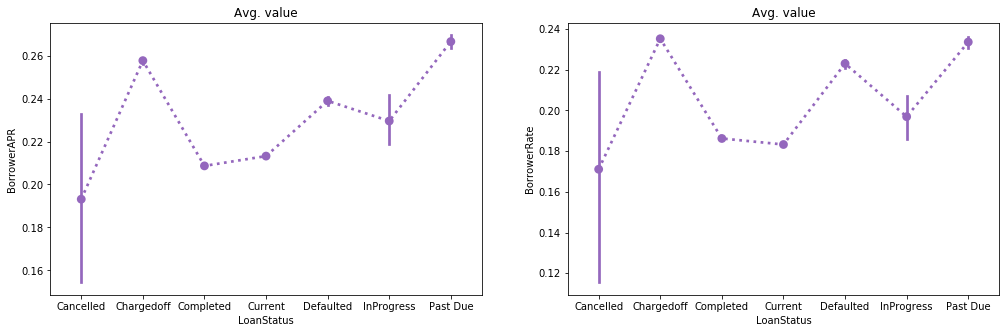

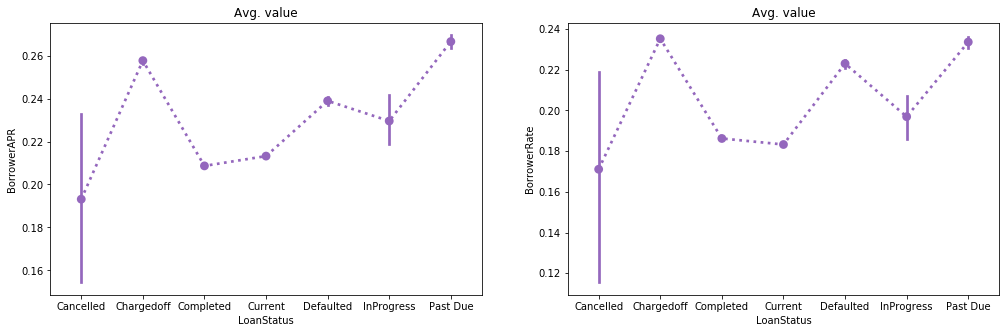

In [55]:
# plot matrix of LoanStatus against numeric features.
i = 1
def Boxgrid(x, y, **kwargs):
    """ Quick hack for creating point plots with seaborn's pointplot """
    
    
    global i
    plt.subplot(1,2,i)
    plt.subplots_adjust(wspace=0.2, hspace= 0.3, )
    sb.pointplot(x, y, linestyles = ":", color=base_color)
    plt.title('Avg. value')
    i += 1

plt.figure(figsize=(17, 5))
Boxgrid(df_sub.LoanStatus, df_sub.BorrowerAPR)
Boxgrid(df_sub.LoanStatus, df_sub.BorrowerRate)
i = 1

The general trend is evident, **Current** and **Completed** `LoanStatus` has the lowest average `borrowers rate` overall, if we considered the great errorlines in **Cancelled**. **Chargedoff**, **Defaulted**, and **Past Due** all have high `borrowers rate` on average.

#### For `BorrowerAPR` and `BorrowerRate`: the pair of `CreditScore Bounds` and `ProsperScore` seemed to be both negatively related to them.

#### For `LoanStatus`:  `CreditScore Bounds`,  `Term`, `ProsperScore` seemed to affect it in various ways.

#### Interestingly, the two pairs of variables: `BorrowerAPR` and `BorrowerRate`, `CreditScoreRangeLower` and `CreditScoreRangeUpper` are almost perfectly related to each other. 

#### There is also an interplay betweeen the `three pivot variables`, although their relationships were not intended to be analyzed initially. 

<span style="color:red">#### Given the extreme similarity in distributions between `BorrowerAPR` and `BorrowerRate` , and as well as between `CreditScoreRangeLower` and `CreditScoreRangeUpper`, I would only use one of each pair to analyze in the next section: namely, `BorrowerAPR` and `CreditScoreRangeLower`. ####</span> 

## Multivariate Exploration

> In this section, I will analyze the relationships between each 3 of the variables, to see how they affect the pivot variables in a deeper level of details.

I will start by looking at `BorrowerAPR`, `CreditScoreRangeLower`, and `ProsperScore`. 

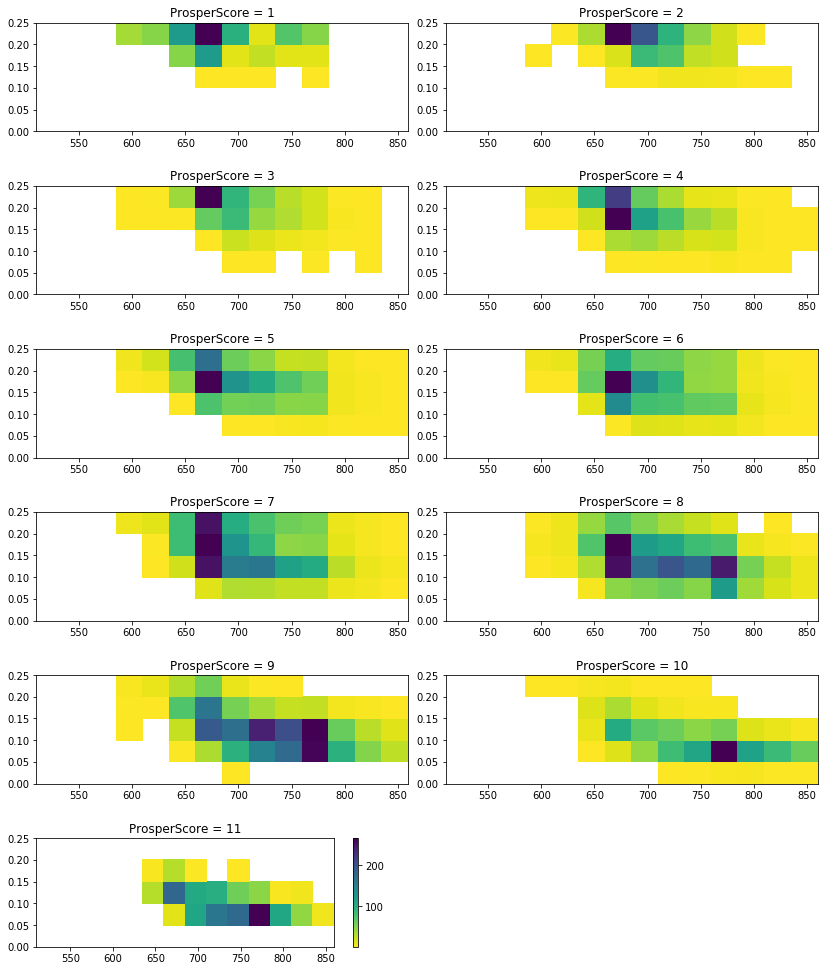

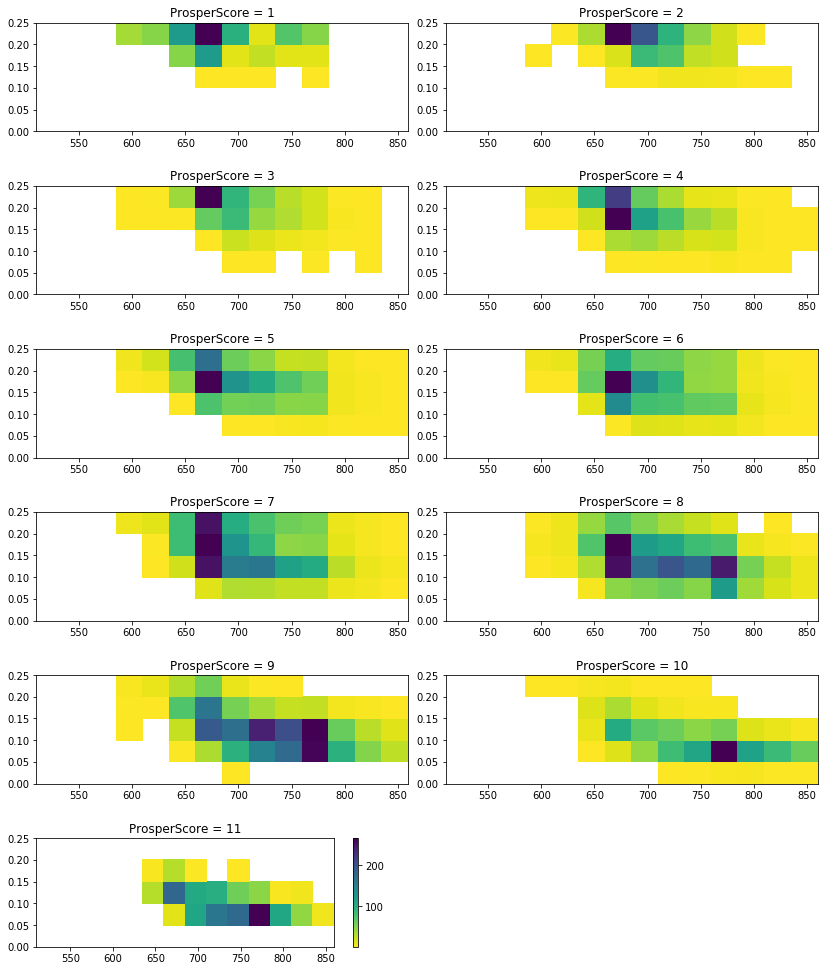

In [56]:
# create faceted heat maps on levels of the ProsperScore variable
bins_x = np.arange(df_sub.CreditScoreRangeLower.min()+150, df_sub.CreditScoreRangeLower.max(), 25.0)
bins_y = np.arange(0.0, 0.3, 0.05)

i = 1
def hist2dgrid(ProsperScore, **kwargs):
    """ Quick hack for creating heatmap plots with pyplot's hist2d """
    
    df_sub_temp = df_sub[df_sub.ProsperScore == ProsperScore]
    
    global i
    plt.subplot(6,2,i)
    plt.subplots_adjust(wspace=0.1, hspace= 0.5, )
    plt.hist2d(data=df_sub_temp, x='CreditScoreRangeLower', y='BorrowerRate' , cmin=0.5, 
               cmap = 'viridis_r', bins = [bins_x, bins_y])
    plt.gca().set_title('ProsperScore = '+ str(i))
    i = int(i)
    i += 1

plt.figure(figsize=(14,17))
for i in range(1, 12):
    hist2dgrid(i)

plt.colorbar()
plt.show()

The trend is most obvious in high `ProsperScore`, like **9.0**, **10.0**, and **11.0**. In high `ProsperScore`, the interst rate decreases as borrowers' `CreditScoreRangeLower` increases. However, the trend is not so evident in low `ProsperScore`.

Next up, I will move on to `LoanStatus`, and starting with its relationship with `Term` and `CreditScoreRangeLower`.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


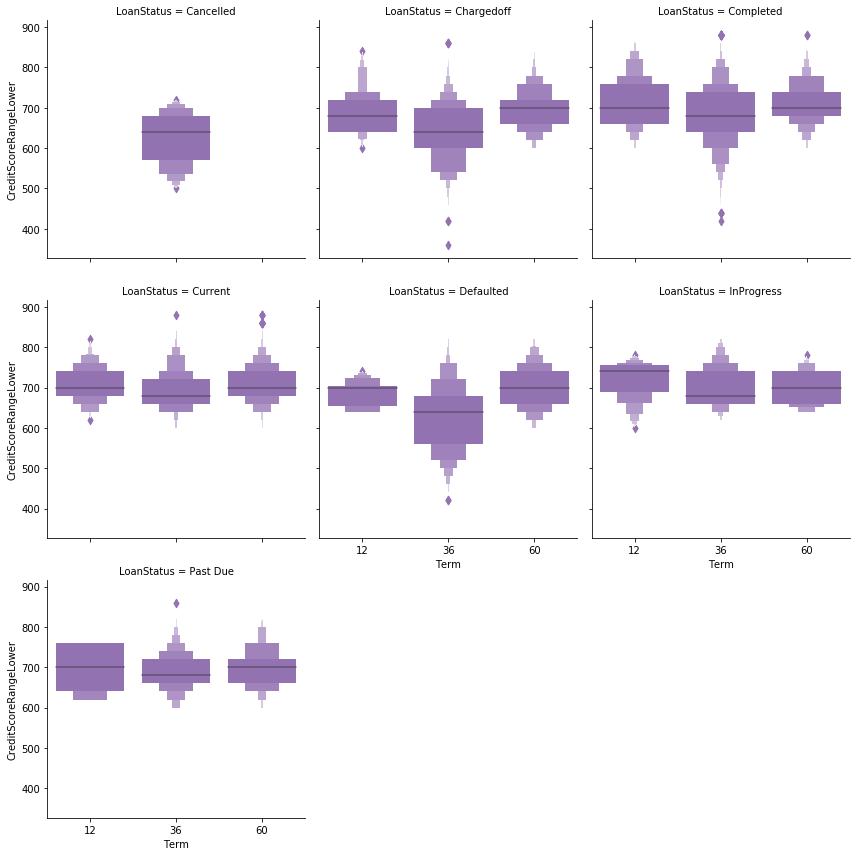

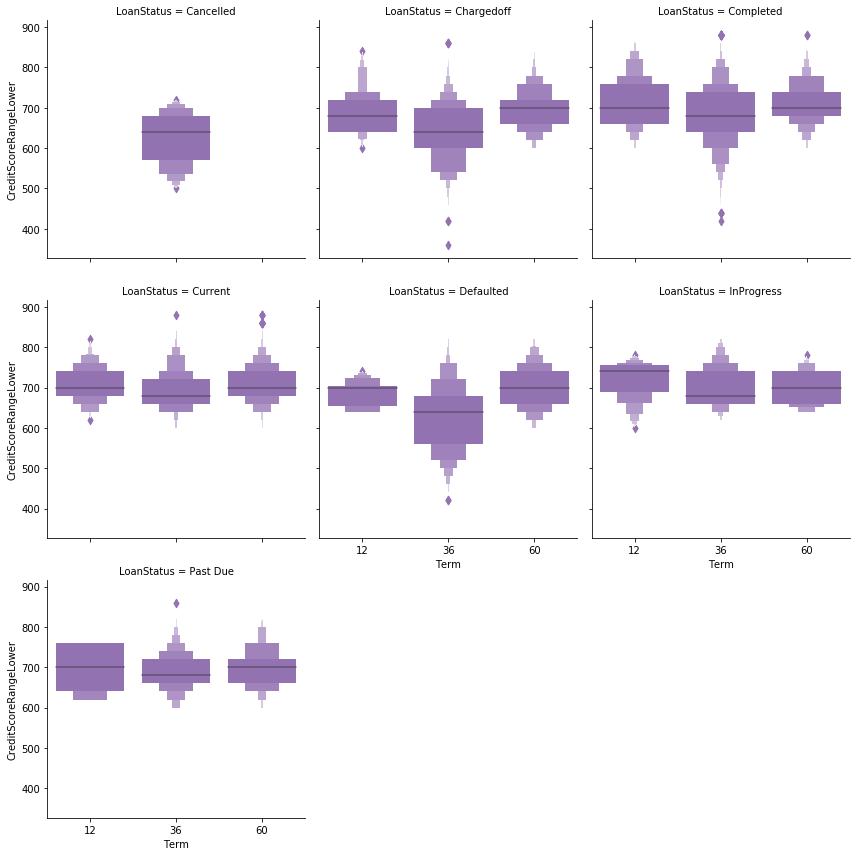

In [57]:
# plot the matrices between LoanStatus, Term, and CreditScoreRangeLower. 
g = sb.FacetGrid(data = df_sub, col = 'LoanStatus', height = 4, col_wrap=3)
g.map(sb.boxenplot, 'Term', 'CreditScoreRangeLower', color=base_color,);

Let's look at each plot individually, the **Cancelled** plot can not provide much information since it only has the `Term` of ***36***; in the **Chargedoff** plot, lower median of `CreditScore` is observed in `Term` ***36***; in btoh **Completed** and **Current** plots, differnt `Term` values did not show much difference in median; in `Defaulted` and `Inprogress` plots, the `Term`***36*** revealed a low median `Creditscore`; finally, the **Past Due** plot did show significant enough difference in medians.

Briefly, if a loan was borrowed in a `Term` of ***36***, then it is more likely to go bad, if the borrower's `CreditScore` is below *700*.

Now, we can move on to the pair `LoanStaus`, `Term`, and `ProsperScore`.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


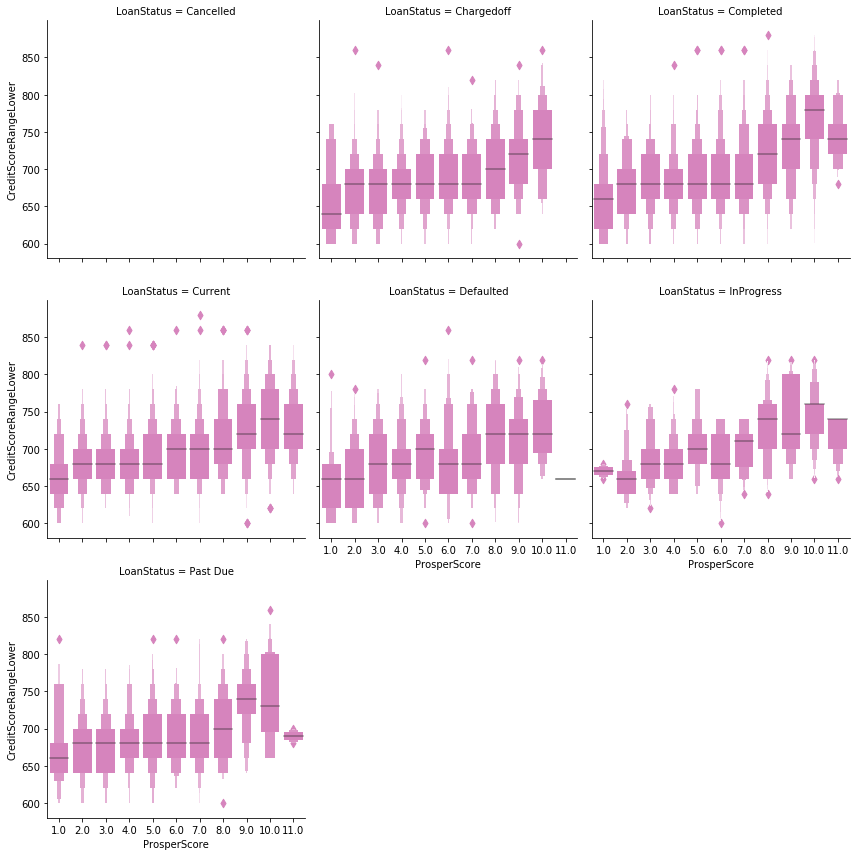

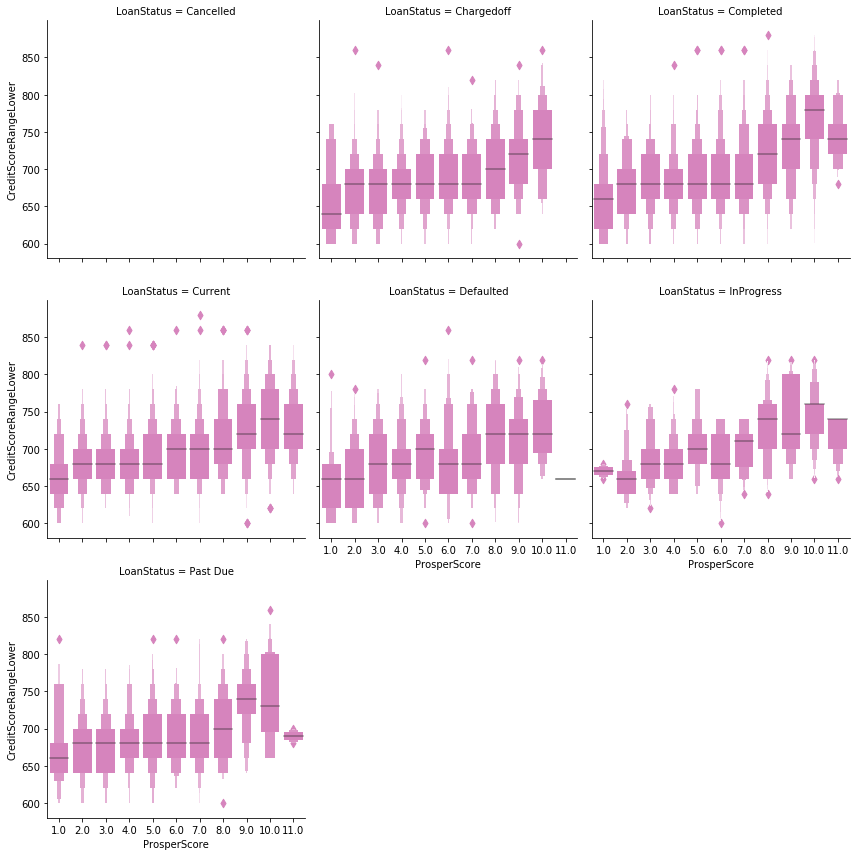

In [58]:
# plot the matrices between LoanStatus, Term, and CreditScoreRangeLower. 
g = sb.FacetGrid(data = df_sub, col = 'LoanStatus', height = 4, col_wrap=3)
g.map(sb.boxenplot, 'ProsperScore', 'CreditScoreRangeLower', color=sb.color_palette()[6]);

One interesting fact from the plots: if a borrower has a high `ProsperScore` of **11.0** and a high `CreditScoreRangeLower`, then his/her loan is almost guaranteed to not go bad. This is witnessed in the **Defaulted**, **Chargedoff**, and **PastDue** boxplots, they have close to zero amount of data with high `ProsperScore` and high `CreditScoreRangeLower` at the same time.

Finally, we will look the three categoricals: `LoanStatus`, `Term`, and `ProsperScore`.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


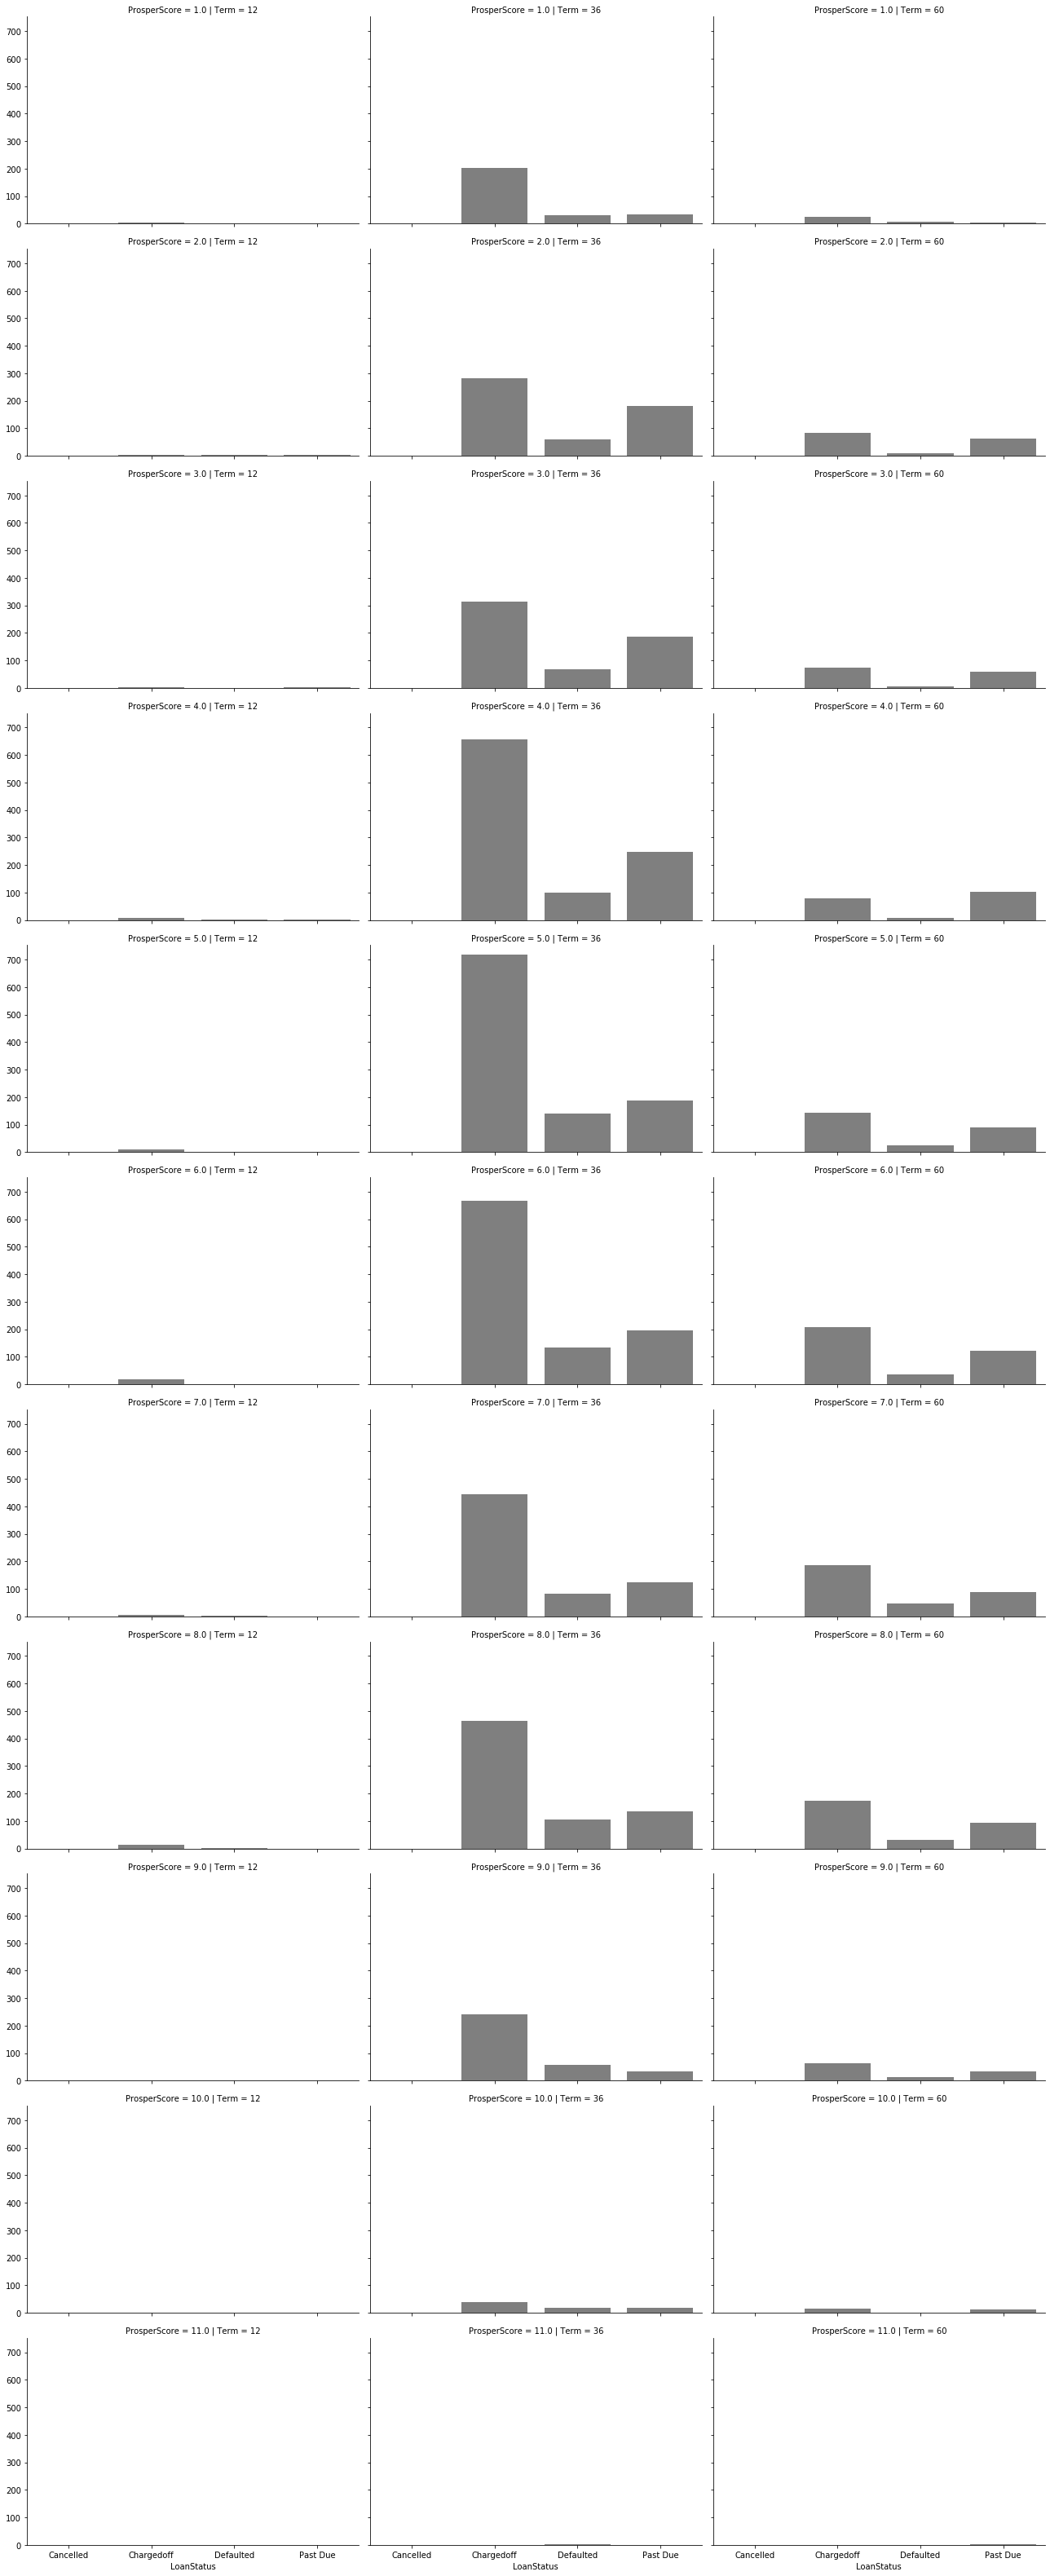

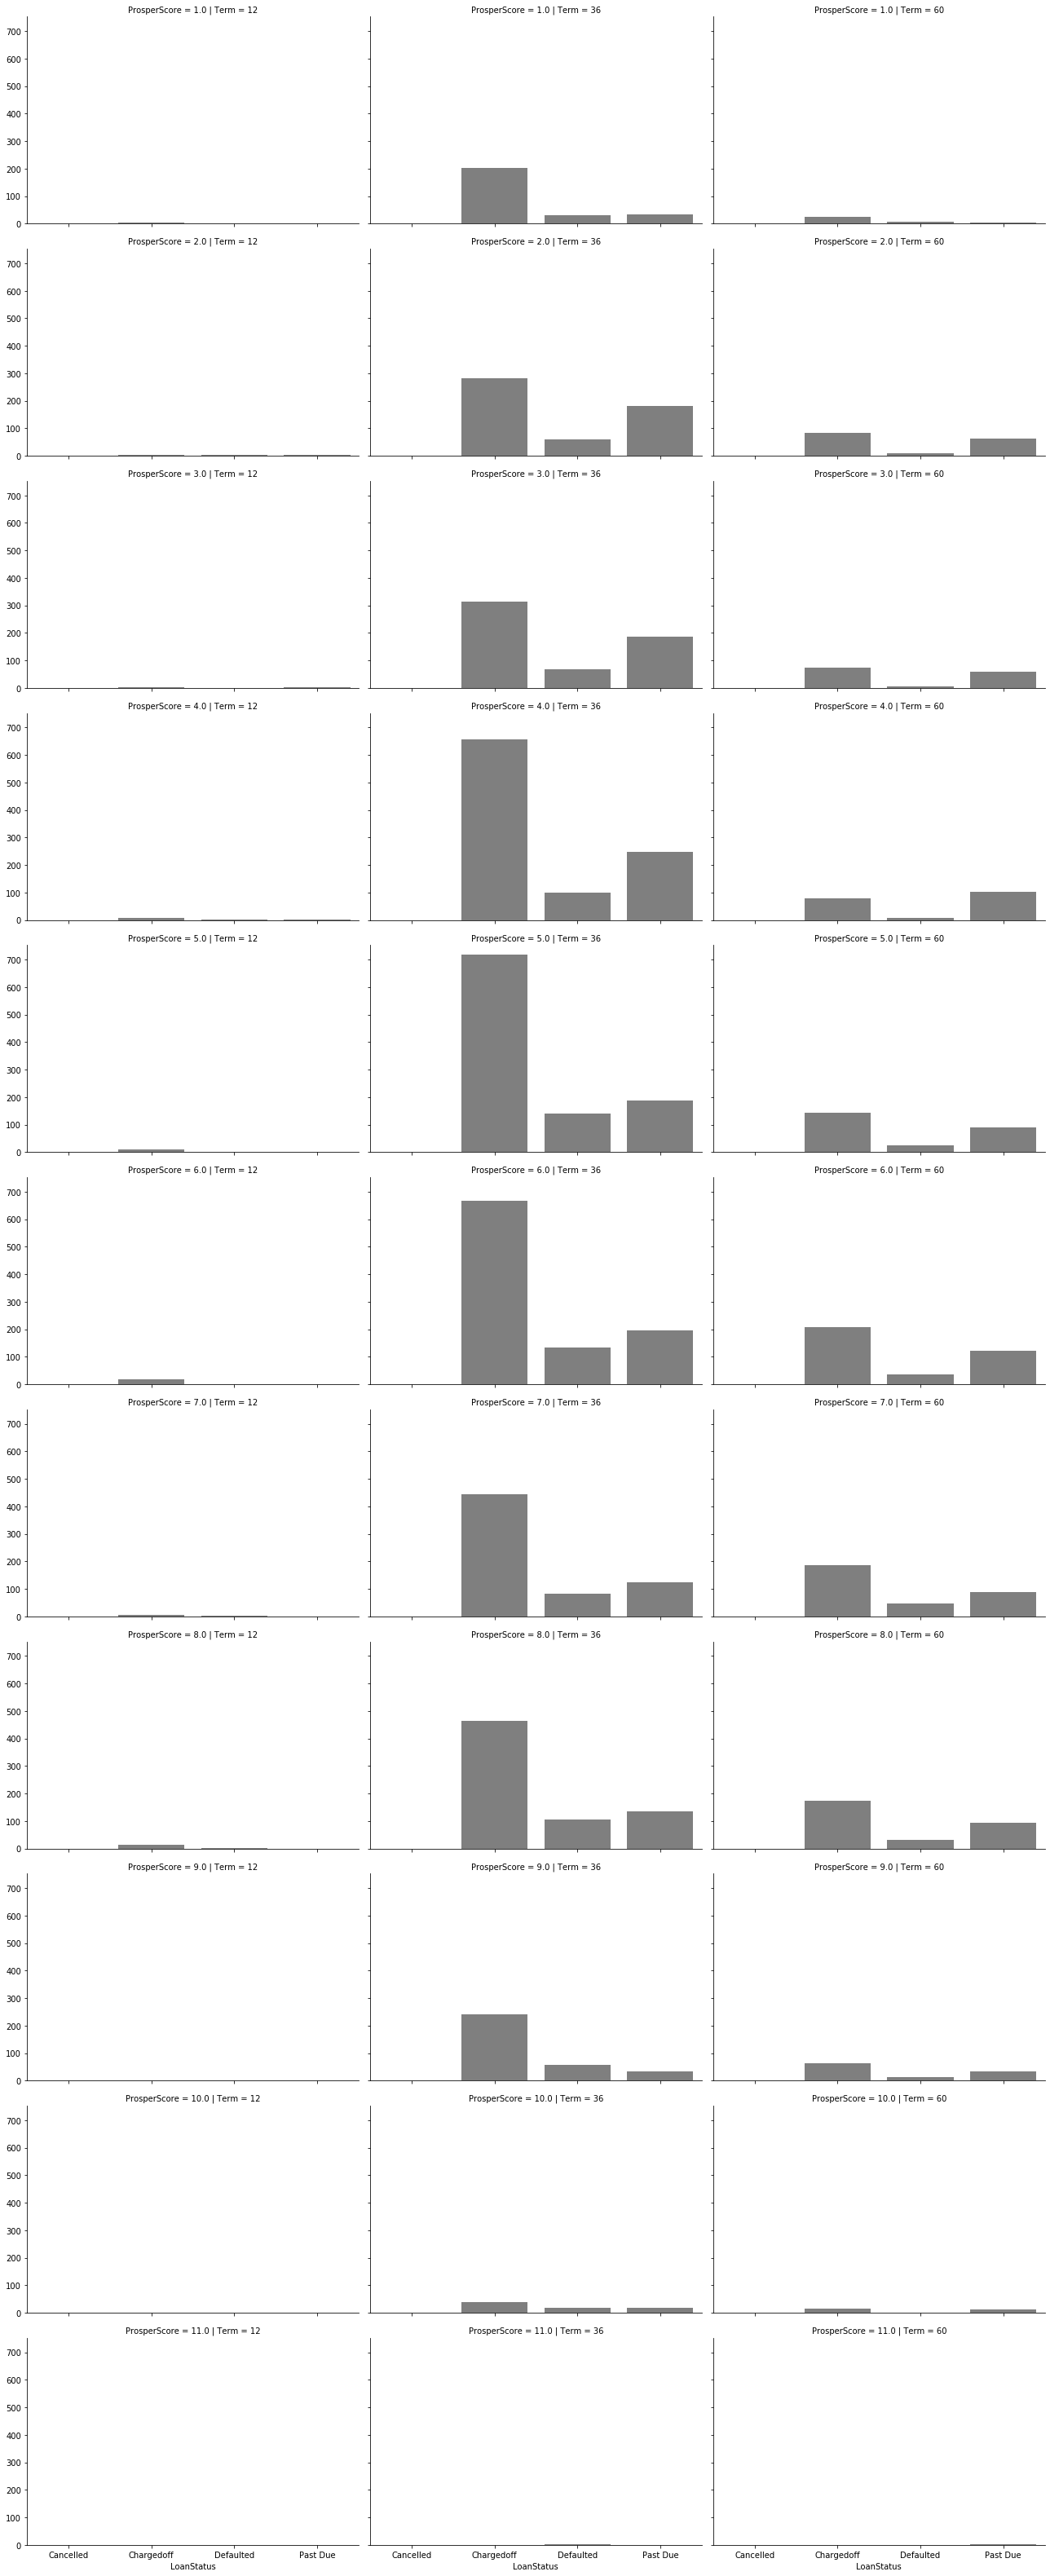

In [59]:
# plot the matrices between LoanStatus, Term, and ProsperScore. 

#since our attention can be focused on the bad loans distribution, I will limit the LoanSatus here.
LoanStatus_sub = ['Cancelled', 'Chargedoff', 'Defaulted', 'Past Due']
df_sub_temp = df_sub.copy()
df_sub_temp  = df_sub_temp[df_sub_temp['LoanStatus'].isin(LoanStatus_sub)]
LoanStatus_sub_order = pd.api.types.CategoricalDtype(categories=LoanStatus_sub, ordered=True)
df_sub_temp.LoanStatus =  df_sub_temp.LoanStatus.astype(LoanStatus_sub_order)

g = sb.FacetGrid(data = df_sub_temp, col = 'Term',row='ProsperScore', height = 4, aspect=1.5)
g.map(sb.countplot, 'LoanStatus', color=sb.color_palette()[7]);

Just as expected, median `ProsperScore` like **5.0**, **6.0** and **7.0**, and the `Term` of ***36*** contributed most to bad loans. The low `ProsperScore` though, might have fewer data in total, and therefore resulted in less count of bad loans.

#### A great deal of interplays were obsereved in this session:
 * In high `ProsperScore`, the interst rate decreases as borrowers' `CreditScoreRangeLower` increases.
 * If a loan was borrowed in a `Term` of ***36***, then it is more likely to go bad, if the borrower's `CreditScore` is below *700*.
 * If a borrower has a high `ProsperScore` of **11.0** and a high `CreditScoreRangeLower` above *700*, then his/her loan is almost guaranteed to not go bad.
 * Median and low `ProsperScore` (< **9.0**) in the `Term` ***36*** coontributed most to bad loans.


#### Surprisingly, even if the `ProsperScore` was recorded as high as **10.0**, it is still possible for the loans to go bad. Meanwhile, high `Credit Score` alone was not sufficient enough to guarantee the sfaety of loans.